<a href="https://colab.research.google.com/github/costinhas/puc-rio-machine-learning/blob/main/MVP_Machine_Learning_Carlos_Costinhas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Informações sobre o notebook

**Autor:**

Carlos Eduardo Azevedo Costinhas da Silva

<br>

**Data de criação:**

06-Abril-2024

<br>

**Descrição:**

Projeto criado como entrega (MVP) para a sprint de Machine Learning & Analytics, do curso de Pós-Graduação em Ciência de Dados e Analytics da PUC-RIO.

Para criação e treinamento dos modelos, manipulação e limpeza dos dados foi utilizada a linguagem Python e as bibliotecas Pandas, Numpy, Matplotlib e Scikit-learn.

<br>

**Objetivo do projeto:**

Criação de um modelo de classificação capaz de prever se vai chover ou não no dia seguinte em uma determinada região, com base nas informações meteorológicas coletadas ao longo dos anos.

O dataset utilizado foi extraído da plataforma Kaggle, disponível no link https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data, e contém dados de cerca de 10 anos de observações diárias do clima em diversos locais da Austrália.

<br><br><br>

# 2. Definição do problema

## 2.1. Contexto

O clima é um fator que influencia atividades de uma variedade de setores, incluindo agricultura, energia, seguros e gestão de recursos naturais. A capacidade de prever com precisão a ocorrência de chuvas pode ser um fator relevante para tomada de decisões nas atividades destes diversos setores.

Com a disponibilidade de grandes conjuntos de dados meteorológicos, técnicas de aprendizado de máquina podem ser empregadas para desenvolver modelos capazes de prever a ocorrência de chuvas com base em observações históricas.







## 2.2. Problema
O problema consiste em desenvolver um modelo de classificação capaz de prever se vai chover ou não no dia seguinte em uma determinada região da Austrália, com base nas informações meteorológicas coletadas ao longo dos anos.

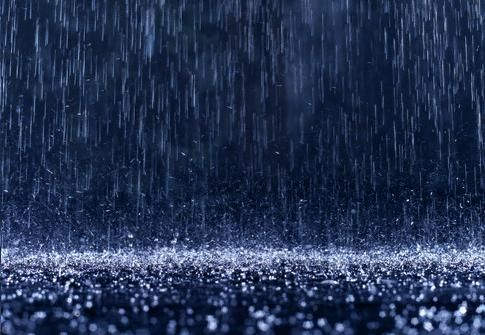

## 2.3. Hipóteses

1. **Correlações meteorológicas:** Supõe-se que certas condições meteorológicas anteriores, como temperatura, precipitação e evaporação de água, exposição solar e vento, estão correlacionadas com a ocorrência de chuvas no dia seguinte.

2. **Padrões sazonais:** Supõe-se que certos padrões sazonais (padrões previsíveis que ocorrem em períodos específicos do ano, repetindo-se em ciclos regulares) influenciam a ocorrência de chuvas em diferentes épocas do ano.

3. **Localização geográfica:** A localização geográfica pode desempenhar um papel significativo na previsão de chuvas, devido a variações regionais nas condições climáticas.

## 2.4. Restrições impostas para seleção dos dados
Este projeto inclui apenas dados disponibilizados pelo dataset público escolhido, com medições realizadas apenas em regiões da Austrália.

Como evoluções futuras, o modelo treinado com estes dados pode ser avaliado para uso em outras regiões, mas para isto será necessário treinamento adicional com dados de outras regiões, ajustes dos parâmetros ou até mesmo a avaliação de outro algoritmo de classificação.

Esta expansão do modelo para predição em outras regiões fora da Austrália não está prevista no escopo deste projeto.

## 2.5. Detalhes do dataset selecionado
O dataset foi extraído da plataforma Kaggle no dia 06/04/2024 e está disponível no link https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data.

Como a plataforma requer login para acessar o conteúdo, uma cópia do dataset foi feita para este [repositório do GitHub](https://github.com/costinhas/puc-rio-machine-learning/tree/main) para facilitar a carga neste notebook.

O dataset possui 145.460 instâncias e 23 atributos, todos mantidos com seus nomes originais em inglês para manter sua identidade:

* **Date** - Data da observação realizada, no formato YYYY-MM-DD

* **Location** - Nome da localização da estação meteorológica onde os dados foram medidos

* **MinTemp** - Temperatura mínima medida em graus Celsius

* **MaxTemp** - Temperatura máxima medida em graus Celsius

* **Rainfall** - Quantidade de precipitação registrada para o dia, em milímetros (mm)

* **Evaporation** - Evaporação de água, medida em mílímetros (mm), de 00h até às 09h

* **Sunshine** - Número de horas de brilho solar no dia

* **WindGustDir** - Direção da rajada de vento mais forte nas últimas 24 horas (00h até 24h)

* **WindGustSpeed** - Velocidade da rajada de vento mais forte nas últimas 24 horas (00h até 24h), medida em kilômetros por hora (km/h)

* **WindDir9am** - Direção do vento às 09h

* **WindDir3pm** - Direção do vento às 15h

* **WindSpeed9am** - Média da velocidade do vento, em kilômetros por hora (km/h), medida a cada 10 minutos até as 09h

* **WindSpeed3pm** - Média da velocidade do vento, em kilômetros por hora (km/h), medida a cada 10 minutos até as 15h

* **Humidity9am** - Umidade (percentual) às 09h

* **Humidity3pm** - Umidade (percentual) às 15h

* **Pressure9am** - Pressão atmosférica (hPa) reduzida ao nível médio do mar às 09h

* **Pressure3pm** - Pressão atmosférica (hPa) reduzida ao nível médio do mar às 15h

* **Cloud9am** - Fração do céu coberta por nuvens às 09h, medida em "oktas", que é uma unidade de oitavos. Registra quantos oitavos do céu estão cobertos por nuvens. Uma medida de 0 indica céu completamente limpo, enquanto um 8 indica que está completamente nublado.

* **Cloud3pm** - Fração do céu coberta por nuvens às 15h, medida em "oktas"

* **Temp9am** - Temperatura às 09h, medida em graus Celsius

* **Temp3pm** - Temperatura às 15h, medida em graus Celsius

* **RainToday** - Indica se houve chuva no dia, de 00h até 09h. Se houve ao menos 1mm de precipitação, terá valor "Yes". Caso contrário, terá valor "No".

* **RainTomorrow** - Indica se houve chuva no dia seguinte à medição, tendo valor "Yes" caso tenha chovido, e "No" caso não tenha chovido. Será usada como a variável de predição.



<br><br><br>

# 3. Carga dos dados

Iniciaremos o projeto com a importação dos pacotes necessários. Utilizaremos a linguagem Python e as bibliotecas Pandas, Numpy, Matplotlib e Scikit-learn.

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Instalando o pacote adicional category_encoders, que fará o OneHotEncoder
!pip install category_encoders

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from category_encoders.one_hot import OneHotEncoder  # para fazer o OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.2 MB/s eta 0:00:00


Variável para definir se os códigos mais demorados serão reprocessados ou não, em uma nova execução completa deste notebook (visando otimizar o tempo de processamento):

In [2]:
# Parâmetro utilizado nas etapas de Feature Selection e de treinamento dos modelos
reprocessaTudo = False

Realizando a carga do dataset, que foi salvo em um repositório do GitHub para facilitar a extração:

In [3]:
# URL do dataset que será carregado
url_dados = 'https://github.com/costinhas/puc-rio-machine-learning/raw/main/weatherAUS.zip'

# Carga do dataset através da URL informada. O caracter separador dos campos é a vírgula.
# Como os labels de cada atributo já estão listados na primeira linha, não será necessário defini-los explicitamente
dataset = pd.read_csv(url_dados, delimiter=',')

# Exibe as primeiras linhas do dataset carregado
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


<br><br><br>

# 4. Preparação dos dados

## 4.1. Visão geral do dataset

Vamos começar analisando as dimensões do dataset:

In [4]:
# Dimensões do dataset
dataset.shape

(145460, 23)

O dataset possui 145.460 instâncias (linhas) e 23 atributos (colunas). Analisando os tipos de cada atributo:

In [5]:
# Visão geral do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<br><br>

## 4.2. Atributos categóricos

Identificando os atributos categóricos no dataset:

In [6]:
# Identificando os atributos (colunas) categóricos do dataset

categoricos = [var for var in dataset.columns if dataset[var].dtype=='O']

print('Existem {} atributos categóricos no dataset:\n'.format(len(categoricos)))
print(categoricos)

Existem 7 atributos categóricos no dataset:

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [7]:
# Exibição das primeiras instâncias, apenas dos atributos categóricos
dataset[categoricos].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


<br><br>

Identificando as cardinalidades destes atributos categóricos:

In [8]:
for var in categoricos:
    print('Atributo ', var, ' contém ', len(dataset[var].unique()), ' valores distintos')

Atributo  Date  contém  3436  valores distintos
Atributo  Location  contém  49  valores distintos
Atributo  WindGustDir  contém  17  valores distintos
Atributo  WindDir9am  contém  17  valores distintos
Atributo  WindDir3pm  contém  17  valores distintos
Atributo  RainToday  contém  3  valores distintos
Atributo  RainTomorrow  contém  3  valores distintos


<br>

**Visão geral dos atributos categóricos:**

* O atributo `Date` armazena datas como texto atualmente. Por isso, possui muitos valores distintos. Iremos converter este atributo em numéricos extraindo seus valores para campos dedicados ao ano, mês e dia.

* 6 atributos contém dados categóricos: `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` e  `RainTomorrow`
  * 2 destes são atributos categóricos binários: `RainToday` e `RainTomorrow`. Estes serão convertidos para valores numéricos 0 e 1.

* `RainTomorrow` é nossa variável target.

<br><br>




### 4.2.1. Conversão do atributo Date

Verificamos anteriormente que o campo `Date` possui muitos valores distintos (3436). Para reduzir sua cardinalidade, iremos substituir este atributo por 3 novos, calculados com base neste: `Year`, `Month` e `Day`.

Esta transformação também contribuirá para o treinamento do modelo, pois a substituição também irá converter os valores categóricos em numéricos.

Estas alterações serão feitas em uma nova versão deste dataset, denominada `datasetTratado`, para mantermos a original sem alterações e avaliar a eficácia do modelo com diferentes versões do mesmo dataset:

In [9]:
# Criando uma nova cópia do dataset principal
datasetTratado = dataset.copy()

# Convertendo o atributo Date do novo dataset para o formato de data
datasetTratado['Date'] = pd.to_datetime(datasetTratado['Date'])

# Criando os novos atributos com base no atributo Date
datasetTratado['Year'] = datasetTratado['Date'].dt.year
datasetTratado['Month'] = datasetTratado['Date'].dt.month
datasetTratado['Day'] = datasetTratado['Date'].dt.day

# Removendo o atributo Date, para manter apenas os novos atributos derivados (Ano, Mês e Dia)
datasetTratado.drop('Date', axis=1, inplace = True)

# Movendo os novos atributos para o início do DataFrame
# Desta forma, garantimos que a variável target continue sendo o último atributo do dataset
colunas = datasetTratado.columns.tolist()
colunas = colunas[-3:] + colunas[:-3]
datasetTratado = datasetTratado[colunas]

# Visão geral do novo dataset
datasetTratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           145460 non-null  int32  
 1   Month          145460 non-null  int32  
 2   Day            145460 non-null  int32  
 3   Location       145460 non-null  object 
 4   MinTemp        143975 non-null  float64
 5   MaxTemp        144199 non-null  float64
 6   Rainfall       142199 non-null  float64
 7   Evaporation    82670 non-null   float64
 8   Sunshine       75625 non-null   float64
 9   WindGustDir    135134 non-null  object 
 10  WindGustSpeed  135197 non-null  float64
 11  WindDir9am     134894 non-null  object 
 12  WindDir3pm     141232 non-null  object 
 13  WindSpeed9am   143693 non-null  float64
 14  WindSpeed3pm   142398 non-null  float64
 15  Humidity9am    142806 non-null  float64
 16  Humidity3pm    140953 non-null  float64
 17  Pressure9am    130395 non-nul

In [10]:
# Visão dos valores dos novos campos criados
print('Year:', datasetTratado['Year'].unique())

print('Month:', datasetTratado['Month'].unique())

print('Day:', datasetTratado['Day'].unique())

Year: [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2007]
Month: [12  1  2  3  4  5  6  7  8  9 10 11]
Day: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


<br><br>

### 4.2.2. Conversão dos atributos RainToday e RainTomorrow

Para faciliar o treinamento do modelo, seguiremos com a conversão dos atributos categóricos em atributos numéricos.

Os atributos RainToday e RainTomorrow possuem valores "Yes" e "No", que serão convertidos em 1 e 0, respectivamente.

In [11]:
# Verificando os valores únicos do atributo RainToday
datasetTratado['RainToday'].value_counts()

RainToday
No     110319
Yes     31880
Name: count, dtype: int64

In [12]:
# Verificando os valores únicos do atributo RainTomorrow
datasetTratado['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [13]:
# Substitui os valores 'Yes' por 1 e 'No' por 0 no atributo 'RainToday'
datasetTratado['RainToday'] = datasetTratado['RainToday'].replace({'Yes': 1, 'No': 0})

# Substitui os valores 'Yes' por 1 e 'No' por 0 no atributo 'RainTomorrow'
datasetTratado['RainTomorrow'] = datasetTratado['RainTomorrow'].replace({'Yes': 1, 'No': 0})

Confirmando a substituição dos valores nos dois atributos:

In [14]:
datasetTratado['RainToday'].value_counts()

RainToday
0.0    110319
1.0     31880
Name: count, dtype: int64

In [15]:
datasetTratado['RainTomorrow'].value_counts()

RainTomorrow
0.0    110316
1.0     31877
Name: count, dtype: int64

<br><br>

### 4.2.3. Conversão dos demais atributos categóricos

Após as transformações de dados realizadas até o momento, vamos verificar quais atributos ainda são categóricos neste dataset:

In [16]:
# Identificando novamente os atributos (colunas) que ainda são categóricos do dataset
categoricos = [var for var in datasetTratado.columns if datasetTratado[var].dtype=='O']

# Contabilizar valores nulos nos atributos categóricos
datasetTratado[categoricos].isnull().sum()

Location           0
WindGustDir    10326
WindDir9am     10566
WindDir3pm      4228
dtype: int64

Para realizar a conversão destes, utilizaremos a técnica de One-hot encoding, realizando as conversões (e criação de novos atributos) no próprio dataset `datasetTratado`.

Porém, antes de realizar esta operação, vamos gerar uma nova versão do dataset, que terá estes atributos categóricos removidos, mantendo apenas os numéricos previamente existentes - e sem converter os categóricos através do One-hot encoding. Esta nova cópia será denominada `datasetTratadoSemCategoricos`.

In [17]:
# Criando o datasetTratadoSemCategoricos a partir de uma cópia do datasetTratado
datasetTratadoSemCategoricos = datasetTratado.copy()

# Identificando os atributos categóricos deste dataset
atributos = [var for var in datasetTratadoSemCategoricos.columns if datasetTratadoSemCategoricos[var].dtype=='O']

# Excluindo os atributos categóricos deste dataset
datasetTratadoSemCategoricos = datasetTratadoSemCategoricos.drop(atributos, axis=1)

# Identificando os atributos categóricos deste dataset
atributos = [var for var in datasetTratadoSemCategoricos.columns if datasetTratadoSemCategoricos[var].dtype=='O']

print('Existem {} atributos categóricos no dataset datasetTratadoSemCategoricos:\n'.format(len(atributos)))
print(atributos)

Existem 0 atributos categóricos no dataset datasetTratadoSemCategoricos:

[]


Após validar que esta versão do dataset `datasetTratadoSemCategoricos` não contém mais atributos categóricos, seguiremos com a realização do One-hot encoding no dataset `datasetTratado`.

In [18]:
# Definindo o encoder, informando as colunas que serão codificadas
oneHotEnc = OneHotEncoder(cols=categoricos)

# Utilizando a função para transformação dos dados
#oneHotEnc.fit_transform(datasetTratado[categoricos])
datasetTratado = oneHotEnc.fit_transform(datasetTratado)

Após realização do One-hot encoding, verificamos que o dataset `datasetTratado` agora possui novos atributos, mas todos somente do tipo numérico:

In [19]:
datasetTratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Columns: 121 entries, Year to RainTomorrow
dtypes: float64(18), int32(3), int64(100)
memory usage: 132.6 MB


<br><br>

## 4.3. Atributos numéricos

Após todas as etapas de tranformação realizadas anteriormente, todos os atributos do dataset `datasetTratado` são numéricos.

In [20]:
# Identificando os atributos (colunas) numéricos do dataset

numericos = [var for var in datasetTratado.columns if datasetTratado[var].dtype!='O']

print('Existem {} atributos numéricos no datasetTratado:\n'.format(len(numericos)))
print(numericos)

Existem 121 atributos numéricos no datasetTratado:

['Year', 'Month', 'Day', 'Location_1', 'Location_2', 'Location_3', 'Location_4', 'Location_5', 'Location_6', 'Location_7', 'Location_8', 'Location_9', 'Location_10', 'Location_11', 'Location_12', 'Location_13', 'Location_14', 'Location_15', 'Location_16', 'Location_17', 'Location_18', 'Location_19', 'Location_20', 'Location_21', 'Location_22', 'Location_23', 'Location_24', 'Location_25', 'Location_26', 'Location_27', 'Location_28', 'Location_29', 'Location_30', 'Location_31', 'Location_32', 'Location_33', 'Location_34', 'Location_35', 'Location_36', 'Location_37', 'Location_38', 'Location_39', 'Location_40', 'Location_41', 'Location_42', 'Location_43', 'Location_44', 'Location_45', 'Location_46', 'Location_47', 'Location_48', 'Location_49', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir_1', 'WindGustDir_2', 'WindGustDir_3', 'WindGustDir_4', 'WindGustDir_5', 'WindGustDir_6', 'WindGustDir_7', 'WindGustDir_8', 

In [21]:
# Exibição das primeiras instâncias, apenas destes atributos numéricos
datasetTratado[numericos].head()

,Year,Month,Day,Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Location_7,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008,12,1,1,0,0,0,0,0,0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008,12,2,1,0,0,0,0,0,0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008,12,3,1,0,0,0,0,0,0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008,12,4,1,0,0,0,0,0,0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008,12,5,1,0,0,0,0,0,0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


### 4.3.1. Análise de Outliers nos atributos numéricos

In [22]:
# Resumo estatístico dos atributos numéricos:
print(round(datasetTratado.describe()),2)

           Year     Month       Day  Location_1  Location_2  Location_3  \
count  145460.0  145460.0  145460.0    145460.0    145460.0    145460.0   
mean     2013.0       6.0      16.0         0.0         0.0         0.0   
std         3.0       3.0       9.0         0.0         0.0         0.0   
min      2007.0       1.0       1.0         0.0         0.0         0.0   
25%      2011.0       3.0       8.0         0.0         0.0         0.0   
50%      2013.0       6.0      16.0         0.0         0.0         0.0   
75%      2015.0       9.0      23.0         0.0         0.0         0.0   
max      2017.0      12.0      31.0         1.0         1.0         1.0   

       Location_4  Location_5  Location_6  Location_7  ...  Humidity9am  \
count    145460.0    145460.0    145460.0    145460.0  ...     142806.0   
mean          0.0         0.0         0.0         0.0  ...         69.0   
std           0.0         0.0         0.0         0.0  ...         19.0   
min           0.0       

Observando os valores do resumo estatístico, podemos observar possíveis *Outliers* nos atributos `Rainfall`, `Evaporation`, `WindSpeed9am` e `WindSpeed3pm`, pois possuem valores máximos (*max*) bem distantes da média (*mean*):



In [23]:
# Selecionando apenas os atributos citados acima
atributos_desejados = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']

# Exibir um resumo estatístico apenas para os atributos selecionados
print(round(datasetTratado[atributos_desejados].describe(), 2))

        Rainfall  Evaporation  WindSpeed9am  WindSpeed3pm
count  142199.00     82670.00     143693.00     142398.00
mean        2.36         5.47         14.04         18.66
std         8.48         4.19          8.92          8.81
min         0.00         0.00          0.00          0.00
25%         0.00         2.60          7.00         13.00
50%         0.00         4.80         13.00         19.00
75%         0.80         7.40         19.00         24.00
max       371.00       145.00        130.00         87.00


<br><br>
Vamos criar boxplots para visualizar os *outliers* nestes atributos:

Text(0, 0.5, 'WindSpeed3pm')

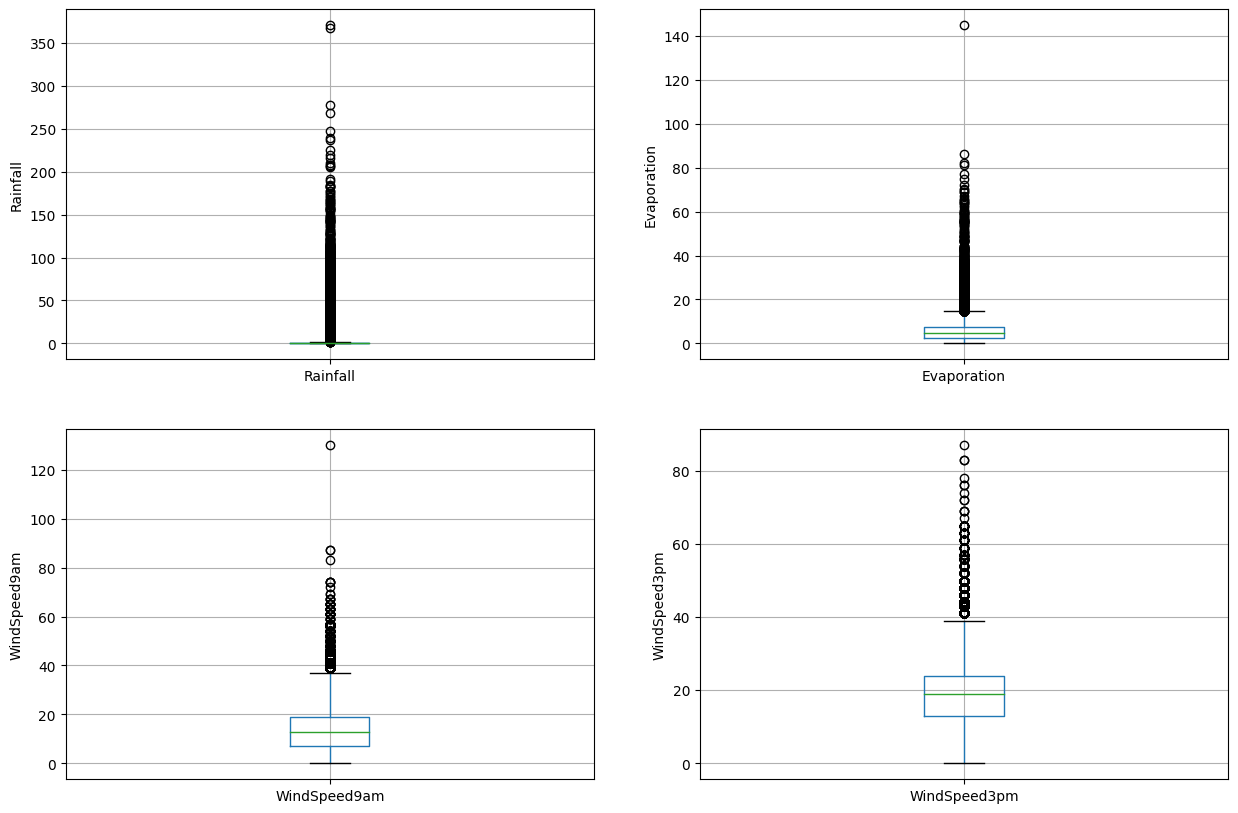

In [24]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = datasetTratado.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = datasetTratado.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = datasetTratado.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = datasetTratado.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

A visão dos boxplots confirma a existência de *outliers*.

Para manter o dataset íntegro e preservar possíveis eventos raros ou situações extremas, que podem estar sendo expressas por meio destes *outliers*, a decisão neste projeto será manter estes registros no dataset.

<br><br>

### 4.3.2. Valores nulos nos atributos numéricos

Identificando valores nulos nos atributos numéricos:

In [25]:
# Identificando os atributos que possuem valores nulos
atributosComNulos = datasetTratado.columns[datasetTratado.isnull().any()]

# Exibindo o total de valores nulos apenas para os atributos que possuam ao menos 1
# desconsiderando os que não possuem nulos (em função da quantidade total de atributos)
datasetTratado[atributosComNulos].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Existem diversas abordagens para tratar valores nulos em atributos numéricos. Poderíamos preencher com valores randômicos; com medidas calculadas como a média (sensível aos outliers), mediana ou moda (estes dois últimos, menos sensíveis aos outliers); ou até mesmo utilizar recursos mais avançados como algoritmos de machine learning para prever os valores.

No contexto deste projeto, como foram identificados *outliers* nos dados, a abordagem escolhida será a substituição dos valores nulos pelo valor da mediana de cada atributo.

Sabemos que estas abordagens citadas podem introduzir ruídos nos dados, incertezas ou até mesmo gerar um *overfitting*. Para avaliar este cenário e testar a melhor abordagem, iremos realizar o tratamento dos valores nulos em uma nova versão do dataset, que será denominada `datasetTratadoSemNulos`.

In [26]:
# Criando o datasetTratadoSemNulos a partir de uma cópia do datasetTratado
datasetTratadoSemNulos = datasetTratado.copy()

Para permitir a comparação entre a melhor abordagem (tratar os nulos ou descartar as linhas que possuem registros nulos), a versão atual do dataset tratado (`datasetTratado`) será renomeada para `datasetValoresNulosRemovidos` e terá todas as linhas que possuem ao menos um valor nulo removidas.

In [27]:
# Renomeando o dataset a partir de uma nova cópia com o novo nome...
datasetValoresNulosRemovidos = datasetTratado.copy()

# ... e a remoção do dataset com nome anterior, para não ter risco de utilizá-lo por engano
del datasetTratado

Iremos remover todas as instâncias (linhas) do dataset `datasetValoresNulosRemovidos` que possuem valores nulos em qualquer um dos atributos:

In [28]:
# Quantidade de linhas antes da remoção
datasetValoresNulosRemovidos.shape

(145460, 121)

In [29]:
# Remove todas as linhas com valores nulos em qualquer atributo
datasetValoresNulosRemovidos = datasetValoresNulosRemovidos.dropna()

In [30]:
# Quantidade de linhas após a remoção
datasetValoresNulosRemovidos.shape

(58090, 121)

<br><br>

Faremos agora o tratamento do dataset `datasetTratadoSemNulos`, realizando a substituição dos valores nulos pelo valor da mediana de cada atributo:

In [31]:
# Para cada atributo identificado anteriormente como numérico...
for atributo in numericos:
        # calcular a mediana deste atributo
        valorMediana=datasetTratadoSemNulos[atributo].median()

        # substituir os valores nulos pelo valor desta mediana
        datasetTratadoSemNulos[atributo].fillna(valorMediana, inplace=True)

<br>

A mesma abordagem será aplicada ao dataset `datasetTratadoSemCategoricos`, substituindo os valores nulos pelo valor da mediana de cada atributo:

In [32]:
# Identificando os atributos numéricos deste dataset
atributos = [var for var in datasetTratadoSemCategoricos.columns if datasetTratadoSemCategoricos[var].dtype!='O']

# Para cada atributo identificado...
for atributo in atributos:
        # calcular a mediana deste atributo
        valorMediana=datasetTratadoSemCategoricos[atributo].median()

        # substituir os valores nulos pelo valor desta mediana
        datasetTratadoSemCategoricos[atributo].fillna(valorMediana, inplace=True)

Comparando agora a quantidade de valores nulos nas 3 versões do dataset (nenhum valor nulo é esperado em nenhum deles):

In [33]:
# Identificando os atributos que possuem valores nulos
atributosComNulos = datasetValoresNulosRemovidos.columns[datasetValoresNulosRemovidos.isnull().any()]

# Exibindo o total de valores nulos apenas para os atributos que possuam ao menos 1
# desconsiderando os que não possuem nulos (em função da quantidade total de atributos)
datasetValoresNulosRemovidos[atributosComNulos].isnull().sum()

Series([], dtype: float64)

In [34]:
# Identificando os atributos que possuem valores nulos
atributosComNulos = datasetTratadoSemNulos.columns[datasetTratadoSemNulos.isnull().any()]

# Exibindo o total de valores nulos apenas para os atributos que possuam ao menos 1
# desconsiderando os que não possuem nulos (em função da quantidade total de atributos)
datasetTratadoSemNulos[atributosComNulos].isnull().sum()

Series([], dtype: float64)

In [35]:
# Identificando os atributos que possuem valores nulos
atributosComNulos = datasetTratadoSemCategoricos.columns[datasetTratadoSemCategoricos.isnull().any()]

# Exibindo o total de valores nulos apenas para os atributos que possuam ao menos 1
# desconsiderando os que não possuem nulos (em função da quantidade total de atributos)
datasetTratadoSemCategoricos[atributosComNulos].isnull().sum()

Series([], dtype: float64)

As três versões do dataset original ( `datasetValoresNulosRemovidos`, `datasetTratadoSemNulos` e `datasetTratadoSemCategoricos`) estão com os atributos preenchidos sem nenhum valor nulo.

<br><br><br>

## 4.4. Datasets após preparação dos dados

Após realizar os tratamentos de dados, temos 4 versões do dataset carregado:

<br>

1. `dataset` - A versão original do dataset, sem nenhuma alteração;

<br>

2. `datasetValoresNulosRemovidos` - Cópia do dataset original (`dataset`), com as seguintes alterações:
  * Substituição do atributo `Data` por 3 novos campos calculados `Year`, `Month` e `Day`;
  * Conversão de todos os atributos categóricos em numéricos;
  * Criação de novos atributos numéricos após codificação One-hot encoding;
  * Remoção de todas as instâncias (linhas) que possuíam registros nulos em qualquer um dos atributos.

<br>

3. `datasetTratadoSemNulos` - Cópia do dataset original (`dataset`), com as seguintes alterações:
  * Substituição do atributo `Data` por 3 novos campos calculados `Year`, `Month` e `Day`;
  * Conversão de todos os atributos categóricos em numéricos;
  * Criação de novos atributos numéricos após codificação One-hot encoding;
  * Substituição dos valores nulos nos atributos numéricos pelo valor de sua mediana.

<br>

4. `datasetTratadoSemCategoricos` - Cópia do dataset original (`dataset`), com as seguintes alterações:
  * Substituição do atributo `Data` por 3 novos campos calculados `Year`, `Month` e `Day`;
  * Conversão dos atributos categóricos `RainToday` e `RainTomorrow` em numéricos;
  * Remoção de todos os demais atributos categóricos (`Location`, `WindGustDir`, `WindDir9am` e `WindDir3pm`), mantendo apenas os atributos numéricos.

<br><br>

## 4.5. Seleção de atributos (Feature Selection)

Utilizaremos a técnica de seleção de atributos (*Feature selection*) para selecionar os atributos (X) que mais contribuem para a saída (y) e utilizá-los para treinamento do modelo, visando reduzir seu número de variáveis de entrada.

<br>

Esta etapa será realizada para as 3 variações do dataset original criadas até aqui (`datasetValoresNulosRemovidos`, `datasetTratadoSemNulos` e `datasetTratadoSemCategoricos`).

### 4.5.1. Dataset com valores nulos removidos (datasetValoresNulosRemovidos)

In [36]:
# Identificando a quantidade de colunas neste dataset
datasetValoresNulosRemovidos.shape

(58090, 121)

In [37]:
# Confirmando que o último atributo deste dataset é a variável target RainTomorrow
print(datasetValoresNulosRemovidos.columns[-1])

RainTomorrow


In [38]:
# Separação em bases de treino e teste (holdout)
array = datasetValoresNulosRemovidos.values
X = array[:,0:120] # atributos
y = array[:,120] # classe (target)

<br>

Realizando a seleção de atributos utilizando **SelectKBest**:

In [39]:
# SelectKBest

if (reprocessaTudo == True):
  # Seleção de atributos com SelectKBest
  best_var = SelectKBest(score_func=f_classif, k=6)

  # Executa a função de pontuação em (X, y) e obtém os atributos selecionados
  fit = best_var.fit(X, y)

  # Reduz X para os atributos selecionados
  features = fit.transform(X)

  # Resultados
  print('\nNúmero original de atributos:', X.shape[1])
  print('\nNúmero reduzido de atributos:', features.shape[1])

  # Exibe os atributos orginais
  #print("\nAtributos Originais:", datasetValoresNulosRemovidos.columns[0:120])

  # Exibe as pontuações de cada atributos e os escolhidos (com as pontuações mais altas)
  np.set_printoptions(precision=3) # 3 casas decimais
  #print("\nScores dos Atributos Originais:", fit.scores_)
  print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=datasetValoresNulosRemovidos.columns[0:120]))

Realizando a seleção de atributos utilizando **Eliminação Recursiva de Atributos**:

In [40]:
# Criação do modelo

if (reprocessaTudo == True):
  modelo = LogisticRegression(max_iter=200)

  # Eliminação Recursiva de Atributos
  rfe = RFE(modelo, n_features_to_select=6)
  fit = rfe.fit(X, y)

  # Print dos resultados
  print('\nNúmero original de atributos:', X.shape[1])
  #print("Atributos Originais:", datasetValoresNulosRemovidos.columns[0:120])

  # Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
  # e com valor 1 em "Ranking dos Atributos")
  #print("\nAtributos Selecionados: %s" % fit.support_)
  #print("\nRanking de atributos: %s" % fit.ranking_)
  #print("\nNúmero reduzido de atributos: %d" % fit.n_features_)
  print("\nAtributos Selecionados: %s" % fit.get_feature_names_out(input_features=datasetValoresNulosRemovidos.columns[0:120]))

### 4.5.2. Dataset tratado, com valores nulos substituídos (datasetTratadoSemNulos)

In [41]:
# Identificando a quantidade de colunas neste dataset
datasetTratadoSemNulos.shape

(145460, 121)

In [42]:
# Confirmando que o último atributo deste dataset é a variável target RainTomorrow
print(datasetTratadoSemNulos.columns[-1])

RainTomorrow


In [43]:
# Separação em bases de treino e teste (holdout)
array = datasetTratadoSemNulos.values
X = array[:,0:120] # atributos
y = array[:,120] # classe (target)

<br><br>

Realizando a seleção de atributos utilizando **SelectKBest**:

In [44]:
# SelectKBest

if (reprocessaTudo == True):
  # Seleção de atributos com SelectKBest
  best_var = SelectKBest(score_func=f_classif, k=6)

  # Executa a função de pontuação em (X, y) e obtém os atributos selecionados
  fit = best_var.fit(X, y)

  # Reduz X para os atributos selecionados
  features = fit.transform(X)

  # Resultados
  print('\nNúmero original de atributos:', X.shape[1])
  print('\nNúmero reduzido de atributos:', features.shape[1])

  # Exibe os atributos orginais
  #print("\nAtributos Originais:", datasetTratadoSemNulos.columns[0:120])

  # Exibe as pontuações de cada atributos e os escolhidos (com as pontuações mais altas)
  np.set_printoptions(precision=3) # 3 casas decimais
  #print("\nScores dos Atributos Originais:", fit.scores_)
  print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=datasetTratadoSemNulos.columns[0:120]))


<br><br>

Realizando a seleção de atributos utilizando **Eliminação Recursiva de Atributos**:

In [45]:
if (reprocessaTudo == True):

  # Criação do modelo
  modelo = LogisticRegression(max_iter=200)

  # Eliminação Recursiva de Atributos
  rfe = RFE(modelo, n_features_to_select=6)
  fit = rfe.fit(X, y)

  # Print dos resultados
  print('\nNúmero original de atributos:', X.shape[1])
  #print("Atributos Originais:", datasetTratadoSemNulos.columns[0:120])

  # Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
  # e com valor 1 em "Ranking dos Atributos")
  #print("\nAtributos Selecionados: %s" % fit.support_)
  #print("\nRanking de atributos: %s" % fit.ranking_)
  print("\nNúmero reduzido de atributos: %d" % fit.n_features_)
  print("\nAtributos Selecionados: %s" % fit.get_feature_names_out(input_features=datasetTratadoSemNulos.columns[0:120]))

<br><br>


### 4.5.3. Dataset com atributos categóricos removidos e  valores nulos substituídos (datasetTratadoSemCategoricos)

In [46]:
# Identificando a quantidade de colunas neste dataset
datasetTratadoSemCategoricos.shape

(145460, 21)

In [47]:
# Confirmando que o último atributo deste dataset é a variável target RainTomorrow
print(datasetTratadoSemCategoricos.columns[-1])

RainTomorrow


In [48]:
# Separação em bases de treino e teste (holdout)
array = datasetTratadoSemCategoricos.values
X = array[:,0:20] # atributos
y = array[:,20] # classe (target)

<br><br>

Realizando a seleção de atributos utilizando **SelectKBest** (com 10 atributos apenas neste caso):

In [49]:
# SelectKBest

if (reprocessaTudo == True):

  # Seleção de atributos com SelectKBest
  best_var = SelectKBest(score_func=f_classif, k=10)

  # Executa a função de pontuação em (X, y) e obtém os atributos selecionados
  fit = best_var.fit(X, y)

  # Reduz X para os atributos selecionados
  features = fit.transform(X)

  # Resultados
  print('\nNúmero original de atributos:', X.shape[1])
  print('\nNúmero reduzido de atributos:', features.shape[1])

  # Exibe os atributos orginais
  #print("\nAtributos Originais:", datasetTratadoSemCategoricos.columns[0:120])

  # Exibe as pontuações de cada atributos e os escolhidos (com as pontuações mais altas)
  np.set_printoptions(precision=3) # 3 casas decimais
  #print("\nScores dos Atributos Originais:", fit.scores_)
  print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=datasetTratadoSemCategoricos.columns[0:20]))

<br><br>

Realizando a seleção de atributos utilizando **Eliminação Recursiva de Atributos**:

In [50]:
if (reprocessaTudo == True):

  # Criação do modelo
  modelo = LogisticRegression(max_iter=200)

  # Eliminação Recursiva de Atributos
  rfe = RFE(modelo, n_features_to_select=10)
  fit = rfe.fit(X, y)

  # Print dos resultados
  print('\nNúmero original de atributos:', X.shape[1])
  #print("Atributos Originais:", datasetTratadoSemCategoricos.columns[0:120])

  # Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
  # e com valor 1 em "Ranking dos Atributos")
  #print("\nAtributos Selecionados: %s" % fit.support_)
  #print("\nRanking de atributos: %s" % fit.ranking_)
  print("\nNúmero reduzido de atributos: %d" % fit.n_features_)
  print("\nAtributos Selecionados: %s" % fit.get_feature_names_out(input_features=datasetTratadoSemCategoricos.columns[0:20]))

### 4.5.4. Análise dos atributos selecionados para as duas primeiras versões (datasetValoresNulosRemovidos e datasetTratadoSemNulos)

Após realização da seleção de atributos nos datasets `datasetValoresNulosRemovidos` e `datasetTratadoSemNulos`, utilizando **SelectKBest** e **Eliminação Recursiva de Atributos**, os seguintes resultados foram obtidos:

<br>

* **Dataset datasetValoresNulosRemovidos**:
  * **SelectKBest**:
    * Atributos Selecionados: `['Sunshine' 'Humidity9am' 'Humidity3pm' 'Cloud9am' 'Cloud3pm' 'RainToday']`

  * **Eliminação Recursiva de Atributos**:
    * Atributos Selecionados: `['Sunshine' 'Humidity3pm' 'Pressure9am' 'Pressure3pm' 'Cloud3pm'
 'RainToday']`

<br>

* **Dataset datasetTratadoSemNulos**:
  * **SelectKBest**:
    * Atributos Selecionados: `['Sunshine' 'Humidity9am' 'Humidity3pm' 'Cloud9am' 'Cloud3pm' 'RainToday']`

  * **Eliminação Recursiva de Atributos**:
    * Atributos Selecionados: `['Sunshine' 'Humidity3pm' 'Pressure9am' 'Pressure3pm' 'Cloud3pm'
 'RainToday']`



<br>

Os atributos selecionados por cada modelo foram os mesmos, independente da versão do dataset.

Conclui-se que as ações de transformação de dados adotadas em cada um dos datasets não gerou diferenças significativas na escolha dos atributos por estes dois modelos selecionados.

<br>

Levando em consideração as recomendações feitas por ambos os modelos, iremos considerar como relevante a combinação de todos os atributos recomendados por ambos os modelos, resultando em 8 atributos:

`['Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday']`

In [51]:
# Criando uma lista com os atributos selecionados e a variáve target RainTomorrow:
atributosSelecionados = ['Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']

# Exibindo a lista criada
print(atributosSelecionados)

['Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']


<br><br>


### 4.5.5. Análise dos atributos selecionados para a terceira versão (datasetTratadoSemCategoricos)

Após realização da seleção de atributos no dataset `datasetTratadoSemCategoricos` utilizando **SelectKBest** e **Eliminação Recursiva de Atributos**, os seguintes resultados foram obtidos:

<br>

* **SelectKBest**:
  * Atributos Selecionados: `['Rainfall' 'Sunshine' 'WindGustSpeed' 'Humidity9am' 'Humidity3pm'
 'Pressure9am' 'Pressure3pm' 'Cloud9am' 'Cloud3pm' 'RainToday']`

* **Eliminação Recursiva de Atributos**:
  * Atributos Selecionados: `['Year' 'MaxTemp' 'Sunshine' 'WindGustSpeed' 'Humidity3pm' 'Pressure9am'
 'Pressure3pm' 'Cloud3pm' 'Temp3pm' 'RainToday']`

<br>

Iremos armazenar estes atributos em duas listas distintas, para avaliar qual delas terá um melhor desempenho nos diferentes modelos.

In [52]:
# Criando uma lista com os atributos selecionados, mais a variável target RainTomorrow:
listaAtributos1 = ['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']
listaAtributos2 = ['Year', 'MaxTemp', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RainTomorrow']

<br><br>


# 5. Modelagem e treinamento

Como verificado anteriormente, a classe de saída está desbalanceada nas duas versões do dataset:

In [53]:
datasetValoresNulosRemovidos['RainTomorrow'].value_counts()

RainTomorrow
0.0    45361
1.0    12729
Name: count, dtype: int64

In [54]:
datasetTratadoSemNulos['RainTomorrow'].value_counts()

RainTomorrow
0.0    113583
1.0     31877
Name: count, dtype: int64

<br>

Utilizaremos a técnica de *Holdout* para separação dos conjuntos de treinamento e teste, adotando também a etapa de estratificação, tendo em vista este desbalanceamento identificado. Além do *Holdout*, utilizaremos também a validação cruzada para permitir a utilização de todos os dados do dataset tanto para treino quanto para teste, afim de obter estimativas mais estáveis e confiáveis do desempenho dos modelos avaliados.

Para análise do desempenho dos modelos, será utilizada a métrica de **Acurácia**, já que os dois valores possíveis para a variável target (Vai chover no dia seguinte? Sim ou Não) são igualmente importantes no contexto deste projeto. Não há uma preferência por modelos que acertem mais resultados verdadeiros positivos, por exemplo.

<br>

Iremos utilizar a validação cruzada em cada uma das versões do dataset (`datasetValoresNulosRemovidos`,  `datasetTratadoSemNulos` e `datasetTratadoSemCategoricos`) considerando todos os seus atributos, e também considerando apenas os atributos selecionados na etapa de Feature Selection.

<br><br>


## 5.1. Versão 1 - Dataset com valores nulos removidos e todos os seus atributos


In [55]:
# Versão do dataset selecionada:
datasetSelecionado = datasetValoresNulosRemovidos

print(datasetSelecionado.shape)

(58090, 121)


In [56]:
# Confirmando que o último atributo deste dataset é a variável target RainTomorrow
print(datasetSelecionado.columns[-1])

RainTomorrow


In [57]:
if (reprocessaTudo == True):
  test_size = 0.20 # tamanho do conjunto de teste
  seed = 7 # semente aleatória

  # Separação em conjuntos de treino e teste
  array = datasetSelecionado.values
  X = array[:,0:120]
  y = array[:,120]
  X_train, X_test, y_train, y_test = train_test_split(X, y,
      test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

  # Parâmetros e partições da validação cruzada
  scoring = 'accuracy'
  num_particoes = 10
  kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [58]:
if (reprocessaTudo == True):

  np.random.seed(7) # definindo uma semente global para este bloco

  # Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
  pipelines = []
  results = []
  names = []

  # Definindo os parâmetros do classificador base para o BaggingClassifier
  base = DecisionTreeClassifier()
  num_trees = 100
  max_features = 3

  # Criando os modelos para o VotingClassifier
  bases = []
  model1 = LogisticRegression(max_iter=200)
  bases.append(('logistic', model1))
  model2 = DecisionTreeClassifier()
  bases.append(('cart', model2))
  model3 = SVC()
  bases.append(('svm', model3))


  # Criando os elementos do pipeline

  # Algoritmos que serão utilizados
  reg_log = ('LR', LogisticRegression(max_iter=200))
  knn = ('KNN', KNeighborsClassifier())
  cart = ('CART', DecisionTreeClassifier())
  naive_bayes = ('NB', GaussianNB())
  svm = ('SVM', SVC())
  bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
  random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
  extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
  adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
  gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
  voting = ('Voting', VotingClassifier(bases))

  # Transformações que serão utilizadas
  standard_scaler = ('StandardScaler', StandardScaler())
  min_max_scaler = ('MinMaxScaler', MinMaxScaler())


  # Montando os pipelines

  # Dataset original
  pipelines.append(('V1-LR-orig', Pipeline([reg_log])))
  pipelines.append(('V1-KNN-orig', Pipeline([knn])))
  pipelines.append(('V1-CART-orig', Pipeline([cart])))
  pipelines.append(('V1-NB-orig', Pipeline([naive_bayes])))
  pipelines.append(('V1-SVM-orig', Pipeline([svm])))
  pipelines.append(('V1-Bag-orig', Pipeline([bagging])))
  pipelines.append(('V1-RF-orig', Pipeline([random_forest])))
  pipelines.append(('V1-ET-orig', Pipeline([extra_trees])))
  pipelines.append(('V1-Ada-orig', Pipeline([adaboost])))
  pipelines.append(('V1-GB-orig', Pipeline([gradient_boosting])))
  #pipelines.append(('V1-Vot-orig', Pipeline([voting])))

  # Dataset Padronizado
  pipelines.append(('V1-LR-padr', Pipeline([standard_scaler, reg_log])))
  pipelines.append(('V1-KNN-padr', Pipeline([standard_scaler, knn])))
  pipelines.append(('V1-CART-padr', Pipeline([standard_scaler, cart])))
  pipelines.append(('V1-NB-padr', Pipeline([standard_scaler, naive_bayes])))
  pipelines.append(('V1-SVM-padr', Pipeline([standard_scaler, svm])))
  pipelines.append(('V1-Bag-padr', Pipeline([standard_scaler, bagging])))
  pipelines.append(('V1-RF-padr', Pipeline([standard_scaler, random_forest])))
  pipelines.append(('V1-ET-padr', Pipeline([standard_scaler, extra_trees])))
  pipelines.append(('V1-Ada-padr', Pipeline([standard_scaler, adaboost])))
  pipelines.append(('V1-GB-padr', Pipeline([standard_scaler, gradient_boosting])))
  #pipelines.append(('V1-Vot-padr', Pipeline([standard_scaler, voting])))

  # Dataset Normalizado
  pipelines.append(('V1-LR-norm', Pipeline([min_max_scaler, reg_log])))
  pipelines.append(('V1-KNN-norm', Pipeline([min_max_scaler, knn])))
  pipelines.append(('V1-CART-norm', Pipeline([min_max_scaler, cart])))
  pipelines.append(('V1-NB-norm', Pipeline([min_max_scaler, naive_bayes])))
  pipelines.append(('V1-SVM-norm', Pipeline([min_max_scaler, svm])))
  pipelines.append(('V1-Bag-norm', Pipeline([min_max_scaler, bagging])))
  pipelines.append(('V1-RF-norm', Pipeline([min_max_scaler, random_forest])))
  pipelines.append(('V1-ET-norm', Pipeline([min_max_scaler, extra_trees])))
  pipelines.append(('V1-Ada-norm', Pipeline([min_max_scaler, adaboost])))
  pipelines.append(('V1-GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
  #pipelines.append(('V1-Vot-norm', Pipeline([min_max_scaler, voting])))

  # Executando os pipelines
  for name, model in pipelines:
      cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
      print(msg)

  # Boxplot de comparação dos modelos
  fig = plt.figure(figsize=(25,6))
  fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
  ax = fig.add_subplot(111)
  plt.boxplot(results)
  ax.set_xticklabels(names, rotation=90)
  plt.show()

Resultados obtidos após execução:

```
V1-LR-orig: 0.856 (0.005)
V1-KNN-orig: 0.844 (0.005)
V1-CART-orig: 0.799 (0.004)
V1-NB-orig: 0.734 (0.009)
V1-SVM-orig: 0.788 (0.001)
V1-Bag-orig: 0.865 (0.005)
V1-RF-orig: 0.859 (0.005)
V1-ET-orig: 0.851 (0.005)
V1-Ada-orig: 0.857 (0.005)
V1-GB-orig: 0.861 (0.006)
V1-LR-padr: 0.859 (0.003)
V1-KNN-padr: 0.812 (0.005)
V1-CART-padr: 0.799 (0.003)
V1-NB-padr: 0.734 (0.009)
V1-SVM-padr: 0.866 (0.006)
V1-Bag-padr: 0.864 (0.005)
V1-RF-padr: 0.858 (0.006)
V1-ET-padr: 0.851 (0.004)
V1-Ada-padr: 0.857 (0.005)
V1-GB-padr: 0.861 (0.006)
V1-LR-norm: 0.859 (0.004)
V1-KNN-norm: 0.809 (0.006)
V1-CART-norm: 0.799 (0.005)
V1-NB-norm: 0.734 (0.009)
V1-SVM-norm: 0.863 (0.005)
V1-Bag-norm: 0.864 (0.006)
V1-RF-norm: 0.858 (0.004)
V1-ET-norm: 0.851 (0.003)
V1-Ada-norm: 0.857 (0.005)
V1-GB-norm: 0.861 (0.005)
```

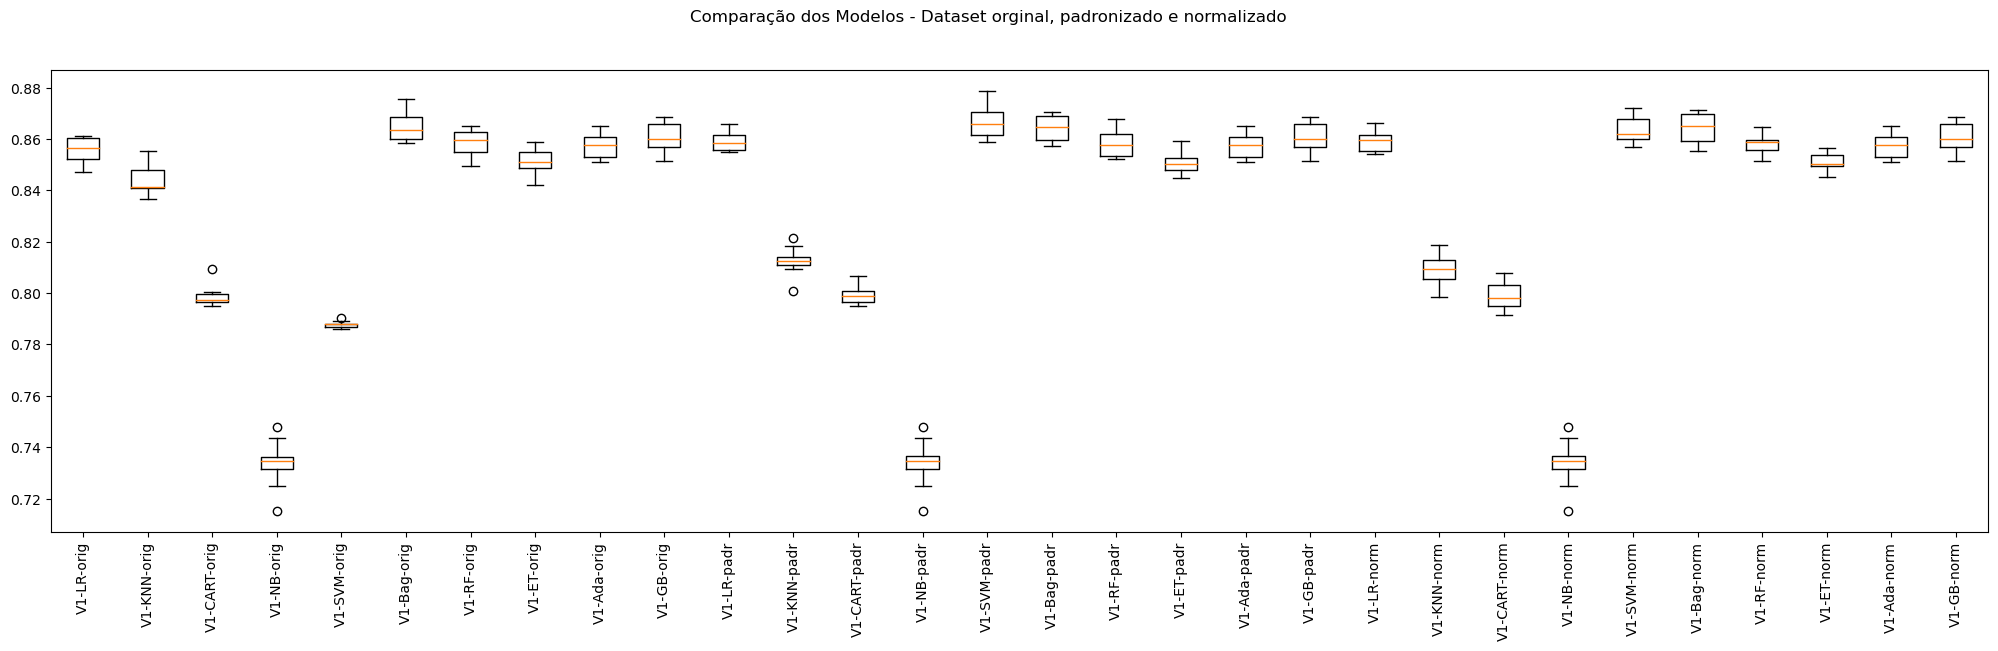

<br><br>


## 5.2. Versão 2 - Dataset com valores nulos removidos e apenas atributos selecionados

In [59]:
# Versão do dataset selecionada:
datasetSelecionado = datasetValoresNulosRemovidos[atributosSelecionados]

print(datasetSelecionado.shape)

(58090, 9)


In [60]:
# Confirmando que o último atributo deste dataset é a variável target RainTomorrow
print(datasetSelecionado.columns[-1])

RainTomorrow


In [61]:
if (reprocessaTudo == True):

  test_size = 0.20 # tamanho do conjunto de teste
  seed = 7 # semente aleatória

  # Separação em conjuntos de treino e teste
  array = datasetSelecionado.values
  X = array[:,0:8]
  y = array[:,8]
  X_train, X_test, y_train, y_test = train_test_split(X, y,
      test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

  # Parâmetros e partições da validação cruzada
  scoring = 'accuracy'
  num_particoes = 10
  kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [62]:
if (reprocessaTudo == True):

  np.random.seed(7) # definindo uma semente global para este bloco

  # Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
  pipelines = []
  results = []
  names = []

  # Definindo os parâmetros do classificador base para o BaggingClassifier
  base = DecisionTreeClassifier()
  num_trees = 100
  max_features = 3

  # Criando os modelos para o VotingClassifier
  bases = []
  model1 = LogisticRegression(max_iter=200)
  bases.append(('logistic', model1))
  model2 = DecisionTreeClassifier()
  bases.append(('cart', model2))
  model3 = SVC()
  bases.append(('svm', model3))


  # Criando os elementos do pipeline

  # Algoritmos que serão utilizados
  reg_log = ('LR', LogisticRegression(max_iter=200))
  knn = ('KNN', KNeighborsClassifier())
  cart = ('CART', DecisionTreeClassifier())
  naive_bayes = ('NB', GaussianNB())
  svm = ('SVM', SVC())
  bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
  random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
  extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
  adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
  gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
  voting = ('Voting', VotingClassifier(bases))

  # Transformações que serão utilizadas
  standard_scaler = ('StandardScaler', StandardScaler())
  min_max_scaler = ('MinMaxScaler', MinMaxScaler())


  # Montando os pipelines

  # Dataset original
  pipelines.append(('V2-LR-orig', Pipeline([reg_log])))
  pipelines.append(('V2-KNN-orig', Pipeline([knn])))
  pipelines.append(('V2-CART-orig', Pipeline([cart])))
  pipelines.append(('V2-NB-orig', Pipeline([naive_bayes])))
  pipelines.append(('V2-SVM-orig', Pipeline([svm])))
  pipelines.append(('V2-Bag-orig', Pipeline([bagging])))
  pipelines.append(('V2-RF-orig', Pipeline([random_forest])))
  pipelines.append(('V2-ET-orig', Pipeline([extra_trees])))
  pipelines.append(('V2-Ada-orig', Pipeline([adaboost])))
  pipelines.append(('V2-GB-orig', Pipeline([gradient_boosting])))
  #pipelines.append(('V2-Vot-orig', Pipeline([voting])))

  # Dataset Padronizado
  pipelines.append(('V2-LR-padr', Pipeline([standard_scaler, reg_log])))
  pipelines.append(('V2-KNN-padr', Pipeline([standard_scaler, knn])))
  pipelines.append(('V2-CART-padr', Pipeline([standard_scaler, cart])))
  pipelines.append(('V2-NB-padr', Pipeline([standard_scaler, naive_bayes])))
  pipelines.append(('V2-SVM-padr', Pipeline([standard_scaler, svm])))
  pipelines.append(('V2-Bag-padr', Pipeline([standard_scaler, bagging])))
  pipelines.append(('V2-RF-padr', Pipeline([standard_scaler, random_forest])))
  pipelines.append(('V2-ET-padr', Pipeline([standard_scaler, extra_trees])))
  pipelines.append(('V2-Ada-padr', Pipeline([standard_scaler, adaboost])))
  pipelines.append(('V2-GB-padr', Pipeline([standard_scaler, gradient_boosting])))
  #pipelines.append(('V2-Vot-padr', Pipeline([standard_scaler, voting])))

  # Dataset Normalizado
  pipelines.append(('V2-LR-norm', Pipeline([min_max_scaler, reg_log])))
  pipelines.append(('V2-KNN-norm', Pipeline([min_max_scaler, knn])))
  pipelines.append(('V2-CART-norm', Pipeline([min_max_scaler, cart])))
  pipelines.append(('V2-NB-norm', Pipeline([min_max_scaler, naive_bayes])))
  pipelines.append(('V2-SVM-norm', Pipeline([min_max_scaler, svm])))
  pipelines.append(('V2-Bag-norm', Pipeline([min_max_scaler, bagging])))
  pipelines.append(('V2-RF-norm', Pipeline([min_max_scaler, random_forest])))
  pipelines.append(('V2-ET-norm', Pipeline([min_max_scaler, extra_trees])))
  pipelines.append(('V2-Ada-norm', Pipeline([min_max_scaler, adaboost])))
  pipelines.append(('V2-GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
  #pipelines.append(('V2-Vot-norm', Pipeline([min_max_scaler, voting])))

  # Executando os pipelines
  for name, model in pipelines:
      cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
      print(msg)

  # Boxplot de comparação dos modelos
  fig = plt.figure(figsize=(25,6))
  fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
  ax = fig.add_subplot(111)
  plt.boxplot(results)
  ax.set_xticklabels(names, rotation=90)
  plt.show()

Resultados obtidos após execução:

```
V2-LR-orig: 0.840 (0.005)
V2-KNN-orig: 0.831 (0.004)
V2-CART-orig: 0.791 (0.004)
V2-NB-orig: 0.793 (0.005)
V2-SVM-orig: 0.838 (0.002)
V2-Bag-orig: 0.850 (0.004)
V2-RF-orig: 0.852 (0.005)
V2-ET-orig: 0.854 (0.005)
V2-Ada-orig: 0.849 (0.005)
V2-GB-orig: 0.851 (0.004)
V2-LR-padr: 0.848 (0.005)
V2-KNN-padr: 0.837 (0.005)
V2-CART-padr: 0.791 (0.004)
V2-NB-padr: 0.793 (0.005)
V2-SVM-padr: 0.850 (0.004)
V2-Bag-padr: 0.850 (0.005)
V2-RF-padr: 0.853 (0.004)
V2-ET-padr: 0.854 (0.004)
V2-Ada-padr: 0.849 (0.005)
V2-GB-padr: 0.851 (0.004)
V2-LR-norm: 0.847 (0.005)
V2-KNN-norm: 0.834 (0.003)
V2-CART-norm: 0.792 (0.005)
V2-NB-norm: 0.793 (0.005)
V2-SVM-norm: 0.849 (0.004)
V2-Bag-norm: 0.850 (0.004)
V2-RF-norm: 0.853 (0.004)
V2-ET-norm: 0.854 (0.004)
V2-Ada-norm: 0.849 (0.005)
V2-GB-norm: 0.851 (0.004)
```



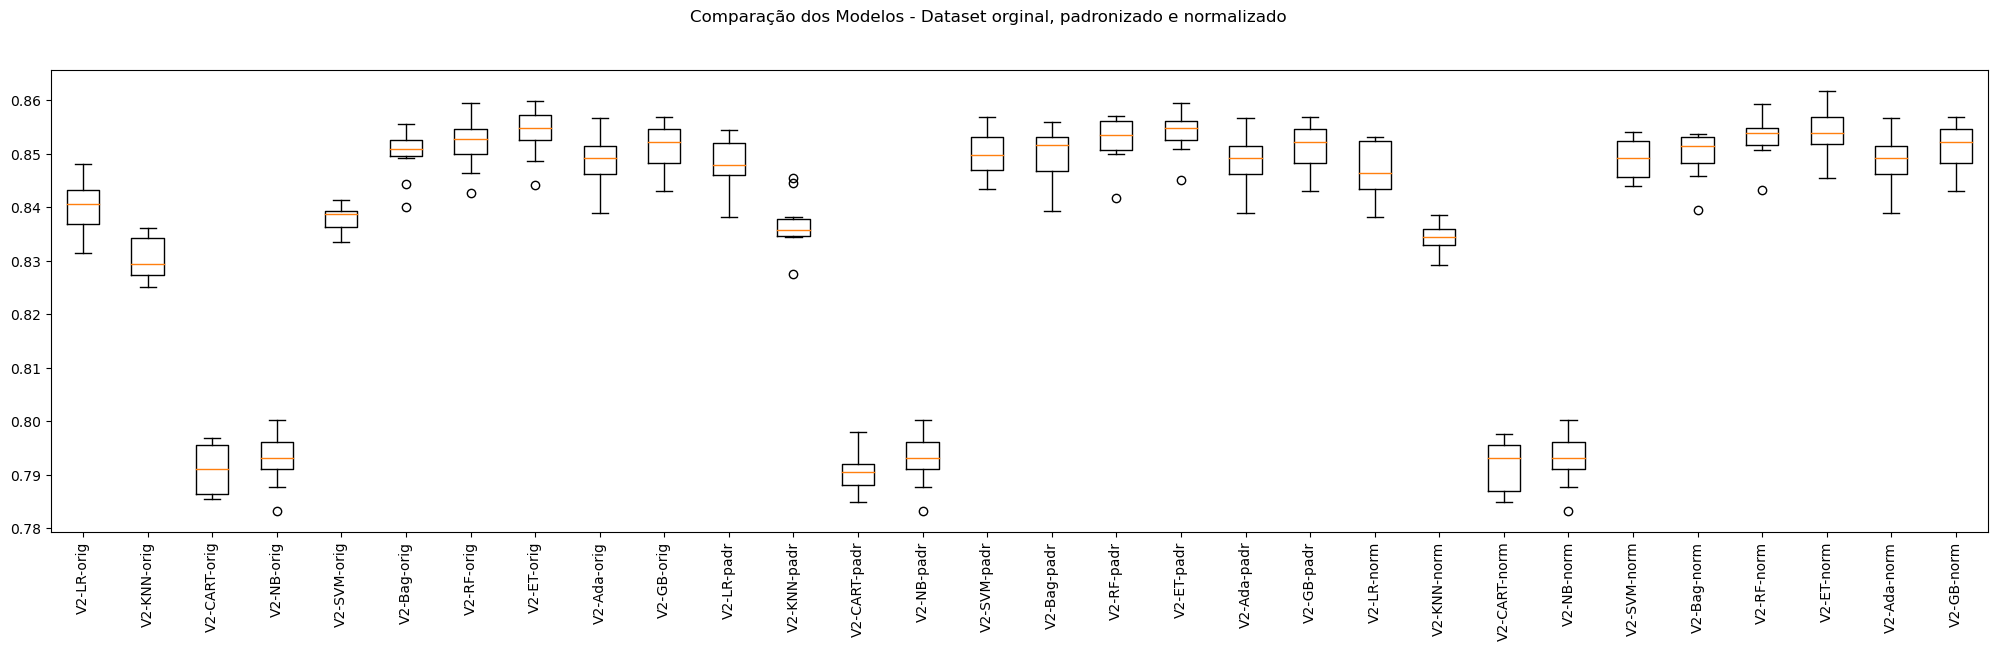

<br><br>


## 5.3. Versão 3 - Dataset com valores nulos tratados e todos os seus atributos

In [63]:
# Versão do dataset selecionada:
datasetSelecionado = datasetTratadoSemNulos

print(datasetSelecionado.shape)

(145460, 121)


In [64]:
# Confirmando que o último atributo deste dataset é a variável target RainTomorrow
print(datasetSelecionado.columns[-1])

RainTomorrow


In [65]:
if (reprocessaTudo == True):

  test_size = 0.20 # tamanho do conjunto de teste
  seed = 7 # semente aleatória

  # Separação em conjuntos de treino e teste
  array = datasetSelecionado.values
  X = array[:,0:120]
  y = array[:,120]
  X_train, X_test, y_train, y_test = train_test_split(X, y,
      test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

  # Parâmetros e partições da validação cruzada
  scoring = 'accuracy'
  num_particoes = 10
  kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [66]:
if (reprocessaTudo == True):

  np.random.seed(7) # definindo uma semente global para este bloco

  # Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
  pipelines = []
  results = []
  names = []

  # Definindo os parâmetros do classificador base para o BaggingClassifier
  base = DecisionTreeClassifier()
  num_trees = 100
  max_features = 3

  # Criando os modelos para o VotingClassifier
  bases = []
  model1 = LogisticRegression(max_iter=200)
  bases.append(('logistic', model1))
  model2 = DecisionTreeClassifier()
  bases.append(('cart', model2))
  model3 = SVC()
  bases.append(('svm', model3))


  # Criando os elementos do pipeline

  # Algoritmos que serão utilizados
  reg_log = ('LR', LogisticRegression(max_iter=200))
  knn = ('KNN', KNeighborsClassifier())
  cart = ('CART', DecisionTreeClassifier())
  naive_bayes = ('NB', GaussianNB())
  svm = ('SVM', SVC())
  bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
  random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
  extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
  adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
  gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
  #voting = ('Voting', VotingClassifier(bases))

  # Transformações que serão utilizadas
  standard_scaler = ('StandardScaler', StandardScaler())
  min_max_scaler = ('MinMaxScaler', MinMaxScaler())


  # Montando os pipelines

  # Dataset original
  pipelines.append(('V3-LR-orig', Pipeline([reg_log])))
  pipelines.append(('V3-KNN-orig', Pipeline([knn])))
  pipelines.append(('V3-CART-orig', Pipeline([cart])))
  pipelines.append(('V3-NB-orig', Pipeline([naive_bayes])))
  pipelines.append(('V3-SVM-orig', Pipeline([svm])))
  pipelines.append(('V3-Bag-orig', Pipeline([bagging])))
  pipelines.append(('V3-RF-orig', Pipeline([random_forest])))
  pipelines.append(('V3-ET-orig', Pipeline([extra_trees])))
  pipelines.append(('V3-Ada-orig', Pipeline([adaboost])))
  pipelines.append(('V3-GB-orig', Pipeline([gradient_boosting])))
  #pipelines.append(('V3-Vot-orig', Pipeline([voting])))

  # Dataset Padronizado
  pipelines.append(('V3-LR-padr', Pipeline([standard_scaler, reg_log])))
  pipelines.append(('V3-KNN-padr', Pipeline([standard_scaler, knn])))
  pipelines.append(('V3-CART-padr', Pipeline([standard_scaler, cart])))
  pipelines.append(('V3-NB-padr', Pipeline([standard_scaler, naive_bayes])))
  pipelines.append(('V3-SVM-padr', Pipeline([standard_scaler, svm])))
  pipelines.append(('V3-Bag-padr', Pipeline([standard_scaler, bagging])))
  pipelines.append(('V3-RF-padr', Pipeline([standard_scaler, random_forest])))
  pipelines.append(('V3-ET-padr', Pipeline([standard_scaler, extra_trees])))
  pipelines.append(('V3-Ada-padr', Pipeline([standard_scaler, adaboost])))
  pipelines.append(('V3-GB-padr', Pipeline([standard_scaler, gradient_boosting])))
  #pipelines.append(('V3-Vot-padr', Pipeline([standard_scaler, voting])))

  # Dataset Normalizado
  pipelines.append(('V3-LR-norm', Pipeline([min_max_scaler, reg_log])))
  pipelines.append(('V3-KNN-norm', Pipeline([min_max_scaler, knn])))
  pipelines.append(('V3-CART-norm', Pipeline([min_max_scaler, cart])))
  pipelines.append(('V3-NB-norm', Pipeline([min_max_scaler, naive_bayes])))
  pipelines.append(('V3-SVM-norm', Pipeline([min_max_scaler, svm])))
  pipelines.append(('V3-Bag-norm', Pipeline([min_max_scaler, bagging])))
  pipelines.append(('V3-RF-norm', Pipeline([min_max_scaler, random_forest])))
  pipelines.append(('V3-ET-norm', Pipeline([min_max_scaler, extra_trees])))
  pipelines.append(('V3-Ada-norm', Pipeline([min_max_scaler, adaboost])))
  pipelines.append(('V3-GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
  #pipelines.append(('V3-Vot-norm', Pipeline([min_max_scaler, voting])))

  # Executando os pipelines
  for name, model in pipelines:
      cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
      print(msg)

  # Boxplot de comparação dos modelos
  fig = plt.figure(figsize=(25,6))
  fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
  ax = fig.add_subplot(111)
  plt.boxplot(results)
  ax.set_xticklabels(names, rotation=90)
  plt.show()

Resultados após execução:

```
V3-LR-orig: 0.841 (0.003)
V3-KNN-orig: 0.835 (0.003)
V3-CART-orig: 0.787 (0.004)
V3-NB-orig: 0.647 (0.003)
V3-SVM-orig: 0.812 (0.002)
V3-Bag-orig: 0.856 (0.004)
V3-RF-orig: 0.850 (0.003)
V3-ET-orig: 0.842 (0.002)
V3-Ada-orig: 0.846 (0.003)
V3-GB-orig: 0.849 (0.004)
V3-LR-padr: 0.847 (0.003)
V3-KNN-padr: 0.807 (0.003)
V3-CART-padr: 0.788 (0.003)
V3-NB-padr: 0.647 (0.003)
V3-SVM-padr: 0.859 (0.003)
V3-Bag-padr: 0.855 (0.003)
V3-RF-padr: 0.850 (0.002)
V3-ET-padr: 0.843 (0.002)
V3-Ada-padr: 0.846 (0.003)
V3-GB-padr: 0.849 (0.004)
V3-LR-norm: 0.847 (0.003)
V3-KNN-norm: 0.800 (0.004)
V3-CART-norm: 0.788 (0.003)
V3-NB-norm: 0.647 (0.003)
V3-SVM-norm: 0.855 (0.003)
V3-Bag-norm: 0.855 (0.003)
V3-RF-norm: 0.850 (0.003)
V3-ET-norm: 0.843 (0.003)
V3-Ada-norm: 0.846 (0.003)
V3-GB-norm: 0.849 (0.004)
```

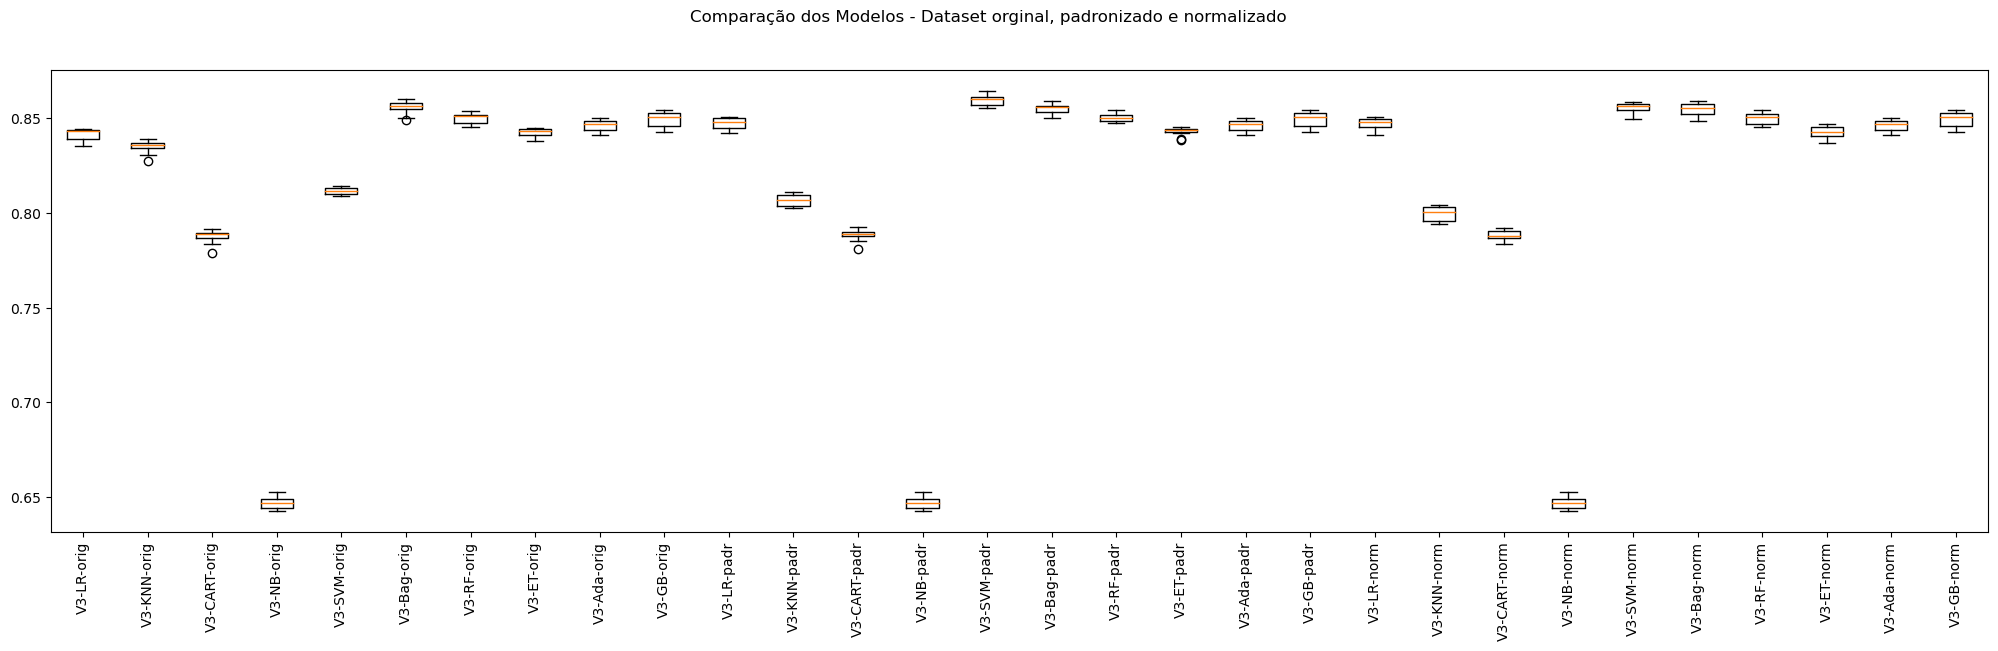

<br><br>


## 5.4. Versão 4 - Dataset com valores nulos tratados e apenas atributos selecionados

In [67]:
# Versão do dataset selecionada:
datasetSelecionado = datasetTratadoSemNulos[atributosSelecionados]

print(datasetSelecionado.shape)

(145460, 9)


In [68]:
# Confirmando que o último atributo deste dataset é a variável target RainTomorrow
print(datasetSelecionado.columns[-1])

RainTomorrow


In [69]:
if (reprocessaTudo == True):

  test_size = 0.20 # tamanho do conjunto de teste
  seed = 7 # semente aleatória

  # Separação em conjuntos de treino e teste
  array = datasetSelecionado.values
  X = array[:,0:8]
  y = array[:,8]
  X_train, X_test, y_train, y_test = train_test_split(X, y,
      test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

  # Parâmetros e partições da validação cruzada
  scoring = 'accuracy'
  num_particoes = 10
  kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [70]:
if (reprocessaTudo == True):

  np.random.seed(7) # definindo uma semente global para este bloco

  # Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
  pipelines = []
  results = []
  names = []

  # Definindo os parâmetros do classificador base para o BaggingClassifier
  base = DecisionTreeClassifier()
  num_trees = 100
  max_features = 3

  # Criando os modelos para o VotingClassifier
  bases = []
  model1 = LogisticRegression(max_iter=200)
  bases.append(('logistic', model1))
  model2 = DecisionTreeClassifier()
  bases.append(('cart', model2))
  model3 = SVC()
  bases.append(('svm', model3))


  # Criando os elementos do pipeline

  # Algoritmos que serão utilizados
  reg_log = ('LR', LogisticRegression(max_iter=200))
  knn = ('KNN', KNeighborsClassifier())
  cart = ('CART', DecisionTreeClassifier())
  naive_bayes = ('NB', GaussianNB())
  svm = ('SVM', SVC())
  bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
  random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
  extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
  adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
  gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
  #voting = ('Voting', VotingClassifier(bases))

  # Transformações que serão utilizadas
  standard_scaler = ('StandardScaler', StandardScaler())
  min_max_scaler = ('MinMaxScaler', MinMaxScaler())


  # Montando os pipelines

  # Dataset original
  pipelines.append(('V4-LR-orig', Pipeline([reg_log])))
  pipelines.append(('V4-KNN-orig', Pipeline([knn])))
  pipelines.append(('V4-CART-orig', Pipeline([cart])))
  pipelines.append(('V4-NB-orig', Pipeline([naive_bayes])))
  pipelines.append(('V4-SVM-orig', Pipeline([svm])))
  pipelines.append(('V4-Bag-orig', Pipeline([bagging])))
  pipelines.append(('V4-RF-orig', Pipeline([random_forest])))
  pipelines.append(('V4-ET-orig', Pipeline([extra_trees])))
  pipelines.append(('V4-Ada-orig', Pipeline([adaboost])))
  pipelines.append(('V4-GB-orig', Pipeline([gradient_boosting])))
  #pipelines.append(('V4-Vot-orig', Pipeline([voting])))

  # Dataset Padronizado
  pipelines.append(('V4-LR-padr', Pipeline([standard_scaler, reg_log])))
  pipelines.append(('V4-KNN-padr', Pipeline([standard_scaler, knn])))
  pipelines.append(('V4-CART-padr', Pipeline([standard_scaler, cart])))
  pipelines.append(('V4-NB-padr', Pipeline([standard_scaler, naive_bayes])))
  pipelines.append(('V4-SVM-padr', Pipeline([standard_scaler, svm])))
  pipelines.append(('V4-Bag-padr', Pipeline([standard_scaler, bagging])))
  pipelines.append(('V4-RF-padr', Pipeline([standard_scaler, random_forest])))
  pipelines.append(('V4-ET-padr', Pipeline([standard_scaler, extra_trees])))
  pipelines.append(('V4-Ada-padr', Pipeline([standard_scaler, adaboost])))
  pipelines.append(('V4-GB-padr', Pipeline([standard_scaler, gradient_boosting])))
  #pipelines.append(('V4-Vot-padr', Pipeline([standard_scaler, voting])))

  # Dataset Normalizado
  pipelines.append(('V4-LR-norm', Pipeline([min_max_scaler, reg_log])))
  pipelines.append(('V4-KNN-norm', Pipeline([min_max_scaler, knn])))
  pipelines.append(('V4-CART-norm', Pipeline([min_max_scaler, cart])))
  pipelines.append(('V4-NB-norm', Pipeline([min_max_scaler, naive_bayes])))
  pipelines.append(('V4-SVM-norm', Pipeline([min_max_scaler, svm])))
  pipelines.append(('V4-Bag-norm', Pipeline([min_max_scaler, bagging])))
  pipelines.append(('V4-RF-norm', Pipeline([min_max_scaler, random_forest])))
  pipelines.append(('V4-ET-norm', Pipeline([min_max_scaler, extra_trees])))
  pipelines.append(('V4-Ada-norm', Pipeline([min_max_scaler, adaboost])))
  pipelines.append(('V4-GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
  #pipelines.append(('V4-Vot-norm', Pipeline([min_max_scaler, voting])))

  # Executando os pipelines
  for name, model in pipelines:
      cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
      print(msg)

  # Boxplot de comparação dos modelos
  fig = plt.figure(figsize=(25,6))
  fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
  ax = fig.add_subplot(111)
  plt.boxplot(results)
  ax.set_xticklabels(names, rotation=90)
  plt.show()

Resultados obtidos após execução:

```
V4-LR-orig: 0.831 (0.004)
V4-KNN-orig: 0.821 (0.003)
V4-CART-orig: 0.774 (0.004)
V4-NB-orig: 0.796 (0.005)
V4-SVM-orig: 0.829 (0.003)
V4-Bag-orig: 0.833 (0.003)
V4-RF-orig: 0.836 (0.003)
V4-ET-orig: 0.834 (0.003)
V4-Ada-orig: 0.838 (0.003)
V4-GB-orig: 0.840 (0.004)
V4-LR-padr: 0.836 (0.003)
V4-KNN-padr: 0.822 (0.002)
V4-CART-padr: 0.774 (0.004)
V4-NB-padr: 0.796 (0.005)
V4-SVM-padr: 0.840 (0.003)
V4-Bag-padr: 0.833 (0.002)
V4-RF-padr: 0.836 (0.003)
V4-ET-padr: 0.834 (0.003)
V4-Ada-padr: 0.838 (0.003)
V4-GB-padr: 0.840 (0.004)
V4-LR-norm: 0.836 (0.003)
V4-KNN-norm: 0.823 (0.003)
V4-CART-norm: 0.774 (0.004)
V4-NB-norm: 0.796 (0.005)
V4-SVM-norm: 0.839 (0.003)
V4-Bag-norm: 0.833 (0.003)
V4-RF-norm: 0.836 (0.003)
V4-ET-norm: 0.833 (0.003)
V4-Ada-norm: 0.838 (0.003)
V4-GB-norm: 0.840 (0.004)
```

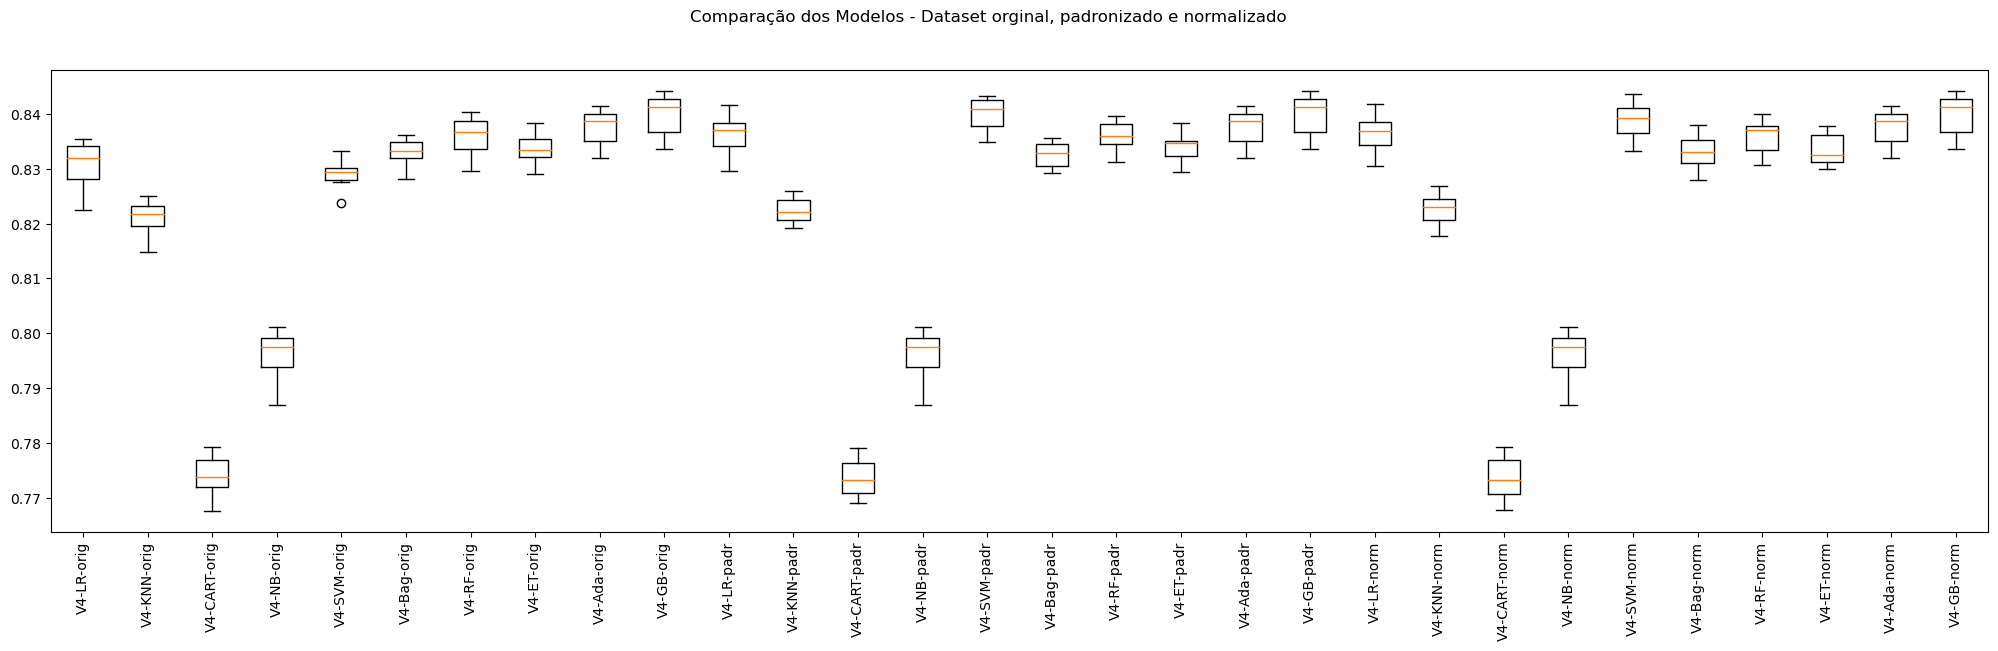

<br><br>


## 5.5. Versão 5 - Dataset com atributos categóricos removidos e todos os seus atributos

In [71]:
# Versão do dataset selecionada:
datasetSelecionado = datasetTratadoSemCategoricos

print(datasetSelecionado.shape)

(145460, 21)


In [72]:
# Confirmando que o último atributo deste dataset é a variável target RainTomorrow
print(datasetSelecionado.columns[-1])

RainTomorrow


In [73]:
if (reprocessaTudo == True):

  test_size = 0.20 # tamanho do conjunto de teste
  seed = 7 # semente aleatória

  # Separação em conjuntos de treino e teste
  array = datasetSelecionado.values
  X = array[:,0:20]
  y = array[:,20]
  X_train, X_test, y_train, y_test = train_test_split(X, y,
      test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

  # Parâmetros e partições da validação cruzada
  scoring = 'accuracy'
  num_particoes = 10
  kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação


In [74]:
if (reprocessaTudo == True):

  np.random.seed(7) # definindo uma semente global para este bloco

  # Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
  pipelines = []
  results = []
  names = []

  # Definindo os parâmetros do classificador base para o BaggingClassifier
  base = DecisionTreeClassifier()
  num_trees = 100
  max_features = 3

  # Criando os modelos para o VotingClassifier
  bases = []
  model1 = LogisticRegression(max_iter=200)
  bases.append(('logistic', model1))
  model2 = DecisionTreeClassifier()
  bases.append(('cart', model2))
  model3 = SVC()
  bases.append(('svm', model3))


  # Criando os elementos do pipeline

  # Algoritmos que serão utilizados
  reg_log = ('LR', LogisticRegression(max_iter=200))
  knn = ('KNN', KNeighborsClassifier())
  cart = ('CART', DecisionTreeClassifier())
  naive_bayes = ('NB', GaussianNB())
  svm = ('SVM', SVC())
  bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
  random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
  extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
  adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
  gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
  #voting = ('Voting', VotingClassifier(bases))

  # Transformações que serão utilizadas
  standard_scaler = ('StandardScaler', StandardScaler())
  min_max_scaler = ('MinMaxScaler', MinMaxScaler())


  # Montando os pipelines

  # Dataset original
  pipelines.append(('V5-LR-orig', Pipeline([reg_log])))
  pipelines.append(('V5-KNN-orig', Pipeline([knn])))
  pipelines.append(('V5-CART-orig', Pipeline([cart])))
  pipelines.append(('V5-NB-orig', Pipeline([naive_bayes])))
  pipelines.append(('V5-SVM-orig', Pipeline([svm])))
  pipelines.append(('V5-Bag-orig', Pipeline([bagging])))
  pipelines.append(('V5-RF-orig', Pipeline([random_forest])))
  pipelines.append(('V5-ET-orig', Pipeline([extra_trees])))
  pipelines.append(('V5-Ada-orig', Pipeline([adaboost])))
  pipelines.append(('V5-GB-orig', Pipeline([gradient_boosting])))
  #pipelines.append(('V5-Vot-orig', Pipeline([voting])))

  # Dataset Padronizado
  pipelines.append(('V5-LR-padr', Pipeline([standard_scaler, reg_log])))
  pipelines.append(('V5-KNN-padr', Pipeline([standard_scaler, knn])))
  pipelines.append(('V5-CART-padr', Pipeline([standard_scaler, cart])))
  pipelines.append(('V5-NB-padr', Pipeline([standard_scaler, naive_bayes])))
  pipelines.append(('V5-SVM-padr', Pipeline([standard_scaler, svm])))
  pipelines.append(('V5-Bag-padr', Pipeline([standard_scaler, bagging])))
  pipelines.append(('V5-RF-padr', Pipeline([standard_scaler, random_forest])))
  pipelines.append(('V5-ET-padr', Pipeline([standard_scaler, extra_trees])))
  pipelines.append(('V5-Ada-padr', Pipeline([standard_scaler, adaboost])))
  pipelines.append(('V5-GB-padr', Pipeline([standard_scaler, gradient_boosting])))
  #pipelines.append(('V5-Vot-padr', Pipeline([standard_scaler, voting])))

  # Dataset Normalizado
  pipelines.append(('V5-LR-norm', Pipeline([min_max_scaler, reg_log])))
  pipelines.append(('V5-KNN-norm', Pipeline([min_max_scaler, knn])))
  pipelines.append(('V5-CART-norm', Pipeline([min_max_scaler, cart])))
  pipelines.append(('V5-NB-norm', Pipeline([min_max_scaler, naive_bayes])))
  pipelines.append(('V5-SVM-norm', Pipeline([min_max_scaler, svm])))
  pipelines.append(('V5-Bag-norm', Pipeline([min_max_scaler, bagging])))
  pipelines.append(('V5-RF-norm', Pipeline([min_max_scaler, random_forest])))
  pipelines.append(('V5-ET-norm', Pipeline([min_max_scaler, extra_trees])))
  pipelines.append(('V5-Ada-norm', Pipeline([min_max_scaler, adaboost])))
  pipelines.append(('V5-GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
  #pipelines.append(('V5-Vot-norm', Pipeline([min_max_scaler, voting])))

  # Executando os pipelines
  for name, model in pipelines:
      cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
      print(msg)

  # Boxplot de comparação dos modelos
  fig = plt.figure(figsize=(25,6))
  fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
  ax = fig.add_subplot(111)
  plt.boxplot(results)
  ax.set_xticklabels(names, rotation=90)
  plt.show()

Resultados obtidos após execução:

```
V5-LR-orig: 0.841 (0.003)
V5-KNN-orig: 0.835 (0.003)
V5-CART-orig: 0.783 (0.004)
V5-NB-orig: 0.803 (0.004)
V5-SVM-orig: 0.818 (0.001)
V5-Bag-orig: 0.853 (0.003)
V5-RF-orig: 0.853 (0.003)
V5-ET-orig: 0.853 (0.003)
V5-Ada-orig: 0.845 (0.003)
V5-GB-orig: 0.848 (0.004)
V5-LR-padr: 0.842 (0.003)
V5-KNN-padr: 0.834 (0.003)
V5-CART-padr: 0.783 (0.003)
V5-NB-padr: 0.803 (0.004)
V5-SVM-padr: 0.851 (0.003)
V5-Bag-padr: 0.853 (0.003)
V5-RF-padr: 0.853 (0.003)
V5-ET-padr: 0.853 (0.003)
V5-Ada-padr: 0.845 (0.003)
V5-GB-padr: 0.848 (0.004)
V5-LR-norm: 0.842 (0.003)
V5-KNN-norm: 0.834 (0.003)
V5-CART-norm: 0.783 (0.004)
V5-NB-norm: 0.803 (0.004)
V5-SVM-norm: 0.845 (0.003)
V5-Bag-norm: 0.852 (0.003)
V5-RF-norm: 0.853 (0.003)
V5-ET-norm: 0.853 (0.003)
V5-Ada-norm: 0.845 (0.003)
V5-GB-norm: 0.848 (0.004)
```

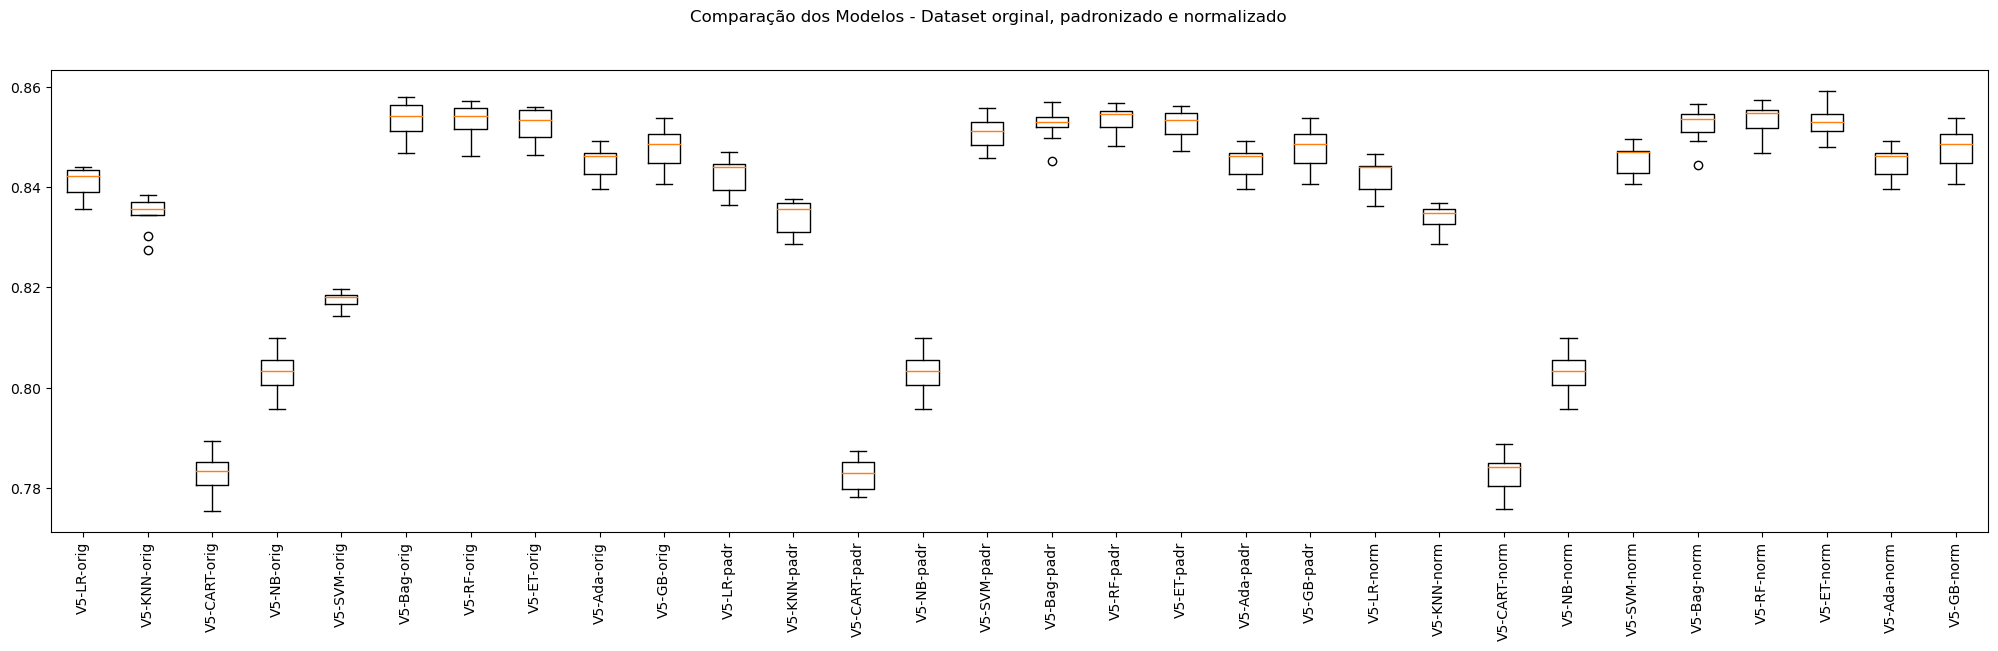

<br><br>


## 5.6. Versão 6 - Dataset com atributos categóricos removidos e a primeira seleção de atributos

In [75]:
# Versão do dataset selecionada:
datasetSelecionado = datasetTratadoSemCategoricos[listaAtributos1]

print(datasetSelecionado.shape)

(145460, 11)


In [76]:
# Confirmando que o último atributo deste dataset é a variável target RainTomorrow
print(datasetSelecionado.columns[-1])

RainTomorrow


In [77]:
if (reprocessaTudo == True):

  test_size = 0.20 # tamanho do conjunto de teste
  seed = 7 # semente aleatória

  # Separação em conjuntos de treino e teste
  array = datasetSelecionado.values
  X = array[:,0:10]
  y = array[:,10]
  X_train, X_test, y_train, y_test = train_test_split(X, y,
      test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

  # Parâmetros e partições da validação cruzada
  scoring = 'accuracy'
  num_particoes = 10
  kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [78]:
if (reprocessaTudo == True):

  np.random.seed(7) # definindo uma semente global para este bloco

  # Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
  pipelines = []
  results = []
  names = []

  # Definindo os parâmetros do classificador base para o BaggingClassifier
  base = DecisionTreeClassifier()
  num_trees = 100
  max_features = 3

  # Criando os modelos para o VotingClassifier
  bases = []
  model1 = LogisticRegression(max_iter=200)
  bases.append(('logistic', model1))
  model2 = DecisionTreeClassifier()
  bases.append(('cart', model2))
  model3 = SVC()
  bases.append(('svm', model3))


  # Criando os elementos do pipeline

  # Algoritmos que serão utilizados
  reg_log = ('LR', LogisticRegression(max_iter=200))
  knn = ('KNN', KNeighborsClassifier())
  cart = ('CART', DecisionTreeClassifier())
  naive_bayes = ('NB', GaussianNB())
  svm = ('SVM', SVC())
  bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
  random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
  extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
  adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
  gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
  voting = ('Voting', VotingClassifier(bases))

  # Transformações que serão utilizadas
  standard_scaler = ('StandardScaler', StandardScaler())
  min_max_scaler = ('MinMaxScaler', MinMaxScaler())


  # Montando os pipelines

  # Dataset original
  pipelines.append(('V6-LR-orig', Pipeline([reg_log])))
  pipelines.append(('V6-KNN-orig', Pipeline([knn])))
  pipelines.append(('V6-CART-orig', Pipeline([cart])))
  pipelines.append(('V6-NB-orig', Pipeline([naive_bayes])))
  pipelines.append(('V6-SVM-orig', Pipeline([svm])))
  pipelines.append(('V6-Bag-orig', Pipeline([bagging])))
  pipelines.append(('V6-RF-orig', Pipeline([random_forest])))
  pipelines.append(('V6-ET-orig', Pipeline([extra_trees])))
  pipelines.append(('V6-Ada-orig', Pipeline([adaboost])))
  pipelines.append(('V6-GB-orig', Pipeline([gradient_boosting])))
  #pipelines.append(('V6-Vot-orig', Pipeline([voting])))

  # Dataset Padronizado
  pipelines.append(('V6-LR-padr', Pipeline([standard_scaler, reg_log])))
  pipelines.append(('V6-KNN-padr', Pipeline([standard_scaler, knn])))
  pipelines.append(('V6-CART-padr', Pipeline([standard_scaler, cart])))
  pipelines.append(('V6-NB-padr', Pipeline([standard_scaler, naive_bayes])))
  pipelines.append(('V6-SVM-padr', Pipeline([standard_scaler, svm])))
  pipelines.append(('V6-Bag-padr', Pipeline([standard_scaler, bagging])))
  pipelines.append(('V6-RF-padr', Pipeline([standard_scaler, random_forest])))
  pipelines.append(('V6-ET-padr', Pipeline([standard_scaler, extra_trees])))
  pipelines.append(('V6-Ada-padr', Pipeline([standard_scaler, adaboost])))
  pipelines.append(('V6-GB-padr', Pipeline([standard_scaler, gradient_boosting])))
  #pipelines.append(('V6-Vot-padr', Pipeline([standard_scaler, voting])))

  # Dataset Normalizado
  pipelines.append(('V6-LR-norm', Pipeline([min_max_scaler, reg_log])))
  pipelines.append(('V6-KNN-norm', Pipeline([min_max_scaler, knn])))
  pipelines.append(('V6-CART-norm', Pipeline([min_max_scaler, cart])))
  pipelines.append(('V6-NB-norm', Pipeline([min_max_scaler, naive_bayes])))
  pipelines.append(('V6-SVM-norm', Pipeline([min_max_scaler, svm])))
  pipelines.append(('V6-Bag-norm', Pipeline([min_max_scaler, bagging])))
  pipelines.append(('V6-RF-norm', Pipeline([min_max_scaler, random_forest])))
  pipelines.append(('V6-ET-norm', Pipeline([min_max_scaler, extra_trees])))
  pipelines.append(('V6-Ada-norm', Pipeline([min_max_scaler, adaboost])))
  pipelines.append(('V6-GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
  #pipelines.append(('V6-Vot-norm', Pipeline([min_max_scaler, voting])))

  # Executando os pipelines
  for name, model in pipelines:
      cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
      print(msg)

  # Boxplot de comparação dos modelos
  fig = plt.figure(figsize=(25,6))
  fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
  ax = fig.add_subplot(111)
  plt.boxplot(results)
  ax.set_xticklabels(names, rotation=90)
  plt.show()

Resultados obtidos após execução:

```
V6-LR-orig: 0.838 (0.003)
V6-KNN-orig: 0.827 (0.004)
V6-CART-orig: 0.777 (0.003)
V6-NB-orig: 0.812 (0.004)
V6-SVM-orig: 0.834 (0.002)
V6-Bag-orig: 0.843 (0.003)
V6-RF-orig: 0.845 (0.002)
V6-ET-orig: 0.843 (0.003)
V6-Ada-orig: 0.843 (0.004)
V6-GB-orig: 0.846 (0.004)
V6-LR-padr: 0.841 (0.003)
V6-KNN-padr: 0.826 (0.003)
V6-CART-padr: 0.777 (0.004)
V6-NB-padr: 0.812 (0.004)
V6-SVM-padr: 0.845 (0.003)
V6-Bag-padr: 0.843 (0.003)
V6-RF-padr: 0.846 (0.002)
V6-ET-padr: 0.843 (0.003)
V6-Ada-padr: 0.843 (0.004)
V6-GB-padr: 0.846 (0.004)
V6-LR-norm: 0.842 (0.003)
V6-KNN-norm: 0.828 (0.003)
V6-CART-norm: 0.776 (0.003)
V6-NB-norm: 0.812 (0.004)
V6-SVM-norm: 0.843 (0.003)
V6-Bag-norm: 0.843 (0.003)
V6-RF-norm: 0.845 (0.003)
V6-ET-norm: 0.843 (0.003)
V6-Ada-norm: 0.843 (0.004)
V6-GB-norm: 0.846 (0.004)
```

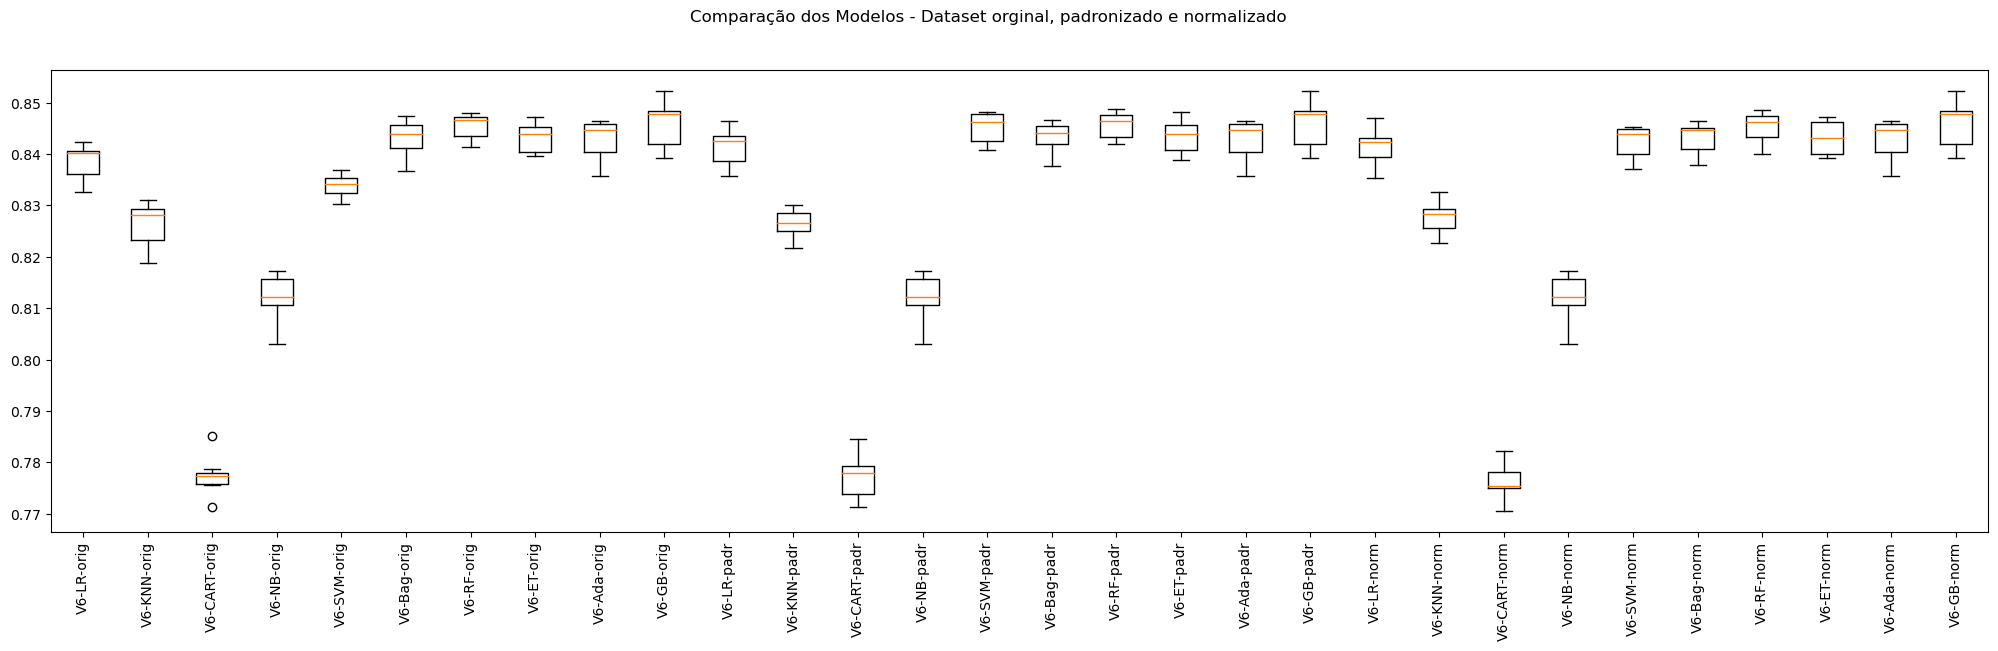

<br><br>


## 5.7. Versão 7 - Dataset com atributos categóricos removidos e a segunda seleção de atributos

In [79]:
# Versão do dataset selecionada:
datasetSelecionado = datasetTratadoSemCategoricos[listaAtributos2]

print(datasetSelecionado.shape)

(145460, 11)


In [80]:
# Confirmando que o último atributo deste dataset é a variável target RainTomorrow
print(datasetSelecionado.columns[-1])

RainTomorrow


In [81]:
if (reprocessaTudo == True):

  test_size = 0.20 # tamanho do conjunto de teste
  seed = 7 # semente aleatória

  # Separação em conjuntos de treino e teste
  array = datasetSelecionado.values
  X = array[:,0:10]
  y = array[:,10]
  X_train, X_test, y_train, y_test = train_test_split(X, y,
      test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

  # Parâmetros e partições da validação cruzada
  scoring = 'accuracy'
  num_particoes = 10
  kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [82]:
if (reprocessaTudo == True):

  np.random.seed(7) # definindo uma semente global para este bloco

  # Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
  pipelines = []
  results = []
  names = []

  # Definindo os parâmetros do classificador base para o BaggingClassifier
  base = DecisionTreeClassifier()
  num_trees = 100
  max_features = 3

  # Criando os modelos para o VotingClassifier
  bases = []
  model1 = LogisticRegression(max_iter=200)
  bases.append(('logistic', model1))
  model2 = DecisionTreeClassifier()
  bases.append(('cart', model2))
  model3 = SVC()
  bases.append(('svm', model3))


  # Criando os elementos do pipeline

  # Algoritmos que serão utilizados
  reg_log = ('LR', LogisticRegression(max_iter=200))
  knn = ('KNN', KNeighborsClassifier())
  cart = ('CART', DecisionTreeClassifier())
  naive_bayes = ('NB', GaussianNB())
  svm = ('SVM', SVC())
  bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
  random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
  extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
  adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
  gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
  voting = ('Voting', VotingClassifier(bases))

  # Transformações que serão utilizadas
  standard_scaler = ('StandardScaler', StandardScaler())
  min_max_scaler = ('MinMaxScaler', MinMaxScaler())


  # Montando os pipelines

  # Dataset original
  pipelines.append(('V7-LR-orig', Pipeline([reg_log])))
  pipelines.append(('V7-KNN-orig', Pipeline([knn])))
  pipelines.append(('V7-CART-orig', Pipeline([cart])))
  pipelines.append(('V7-NB-orig', Pipeline([naive_bayes])))
  pipelines.append(('V7-SVM-orig', Pipeline([svm])))
  pipelines.append(('V7-Bag-orig', Pipeline([bagging])))
  pipelines.append(('V7-RF-orig', Pipeline([random_forest])))
  pipelines.append(('V7-ET-orig', Pipeline([extra_trees])))
  pipelines.append(('V7-Ada-orig', Pipeline([adaboost])))
  pipelines.append(('V7-GB-orig', Pipeline([gradient_boosting])))
  #pipelines.append(('V7-Vot-orig', Pipeline([voting])))

  # Dataset Padronizado
  pipelines.append(('V7-LR-padr', Pipeline([standard_scaler, reg_log])))
  pipelines.append(('V7-KNN-padr', Pipeline([standard_scaler, knn])))
  pipelines.append(('V7-CART-padr', Pipeline([standard_scaler, cart])))
  pipelines.append(('V7-NB-padr', Pipeline([standard_scaler, naive_bayes])))
  pipelines.append(('V7-SVM-padr', Pipeline([standard_scaler, svm])))
  pipelines.append(('V7-Bag-padr', Pipeline([standard_scaler, bagging])))
  pipelines.append(('V7-RF-padr', Pipeline([standard_scaler, random_forest])))
  pipelines.append(('V7-ET-padr', Pipeline([standard_scaler, extra_trees])))
  pipelines.append(('V7-Ada-padr', Pipeline([standard_scaler, adaboost])))
  pipelines.append(('V7-GB-padr', Pipeline([standard_scaler, gradient_boosting])))
  #pipelines.append(('V7-Vot-padr', Pipeline([standard_scaler, voting])))

  # Dataset Normalizado
  pipelines.append(('V7-LR-norm', Pipeline([min_max_scaler, reg_log])))
  pipelines.append(('V7-KNN-norm', Pipeline([min_max_scaler, knn])))
  pipelines.append(('V7-CART-norm', Pipeline([min_max_scaler, cart])))
  pipelines.append(('V7-NB-norm', Pipeline([min_max_scaler, naive_bayes])))
  pipelines.append(('V7-SVM-norm', Pipeline([min_max_scaler, svm])))
  pipelines.append(('V7-Bag-norm', Pipeline([min_max_scaler, bagging])))
  pipelines.append(('V7-RF-norm', Pipeline([min_max_scaler, random_forest])))
  pipelines.append(('V7-ET-norm', Pipeline([min_max_scaler, extra_trees])))
  pipelines.append(('V7-Ada-norm', Pipeline([min_max_scaler, adaboost])))
  pipelines.append(('V7-GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
  #pipelines.append(('V7-Vot-norm', Pipeline([min_max_scaler, voting])))

  # Executando os pipelines
  for name, model in pipelines:
      cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
      print(msg)

  # Boxplot de comparação dos modelos
  fig = plt.figure(figsize=(25,6))
  fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
  ax = fig.add_subplot(111)
  plt.boxplot(results)
  ax.set_xticklabels(names, rotation=90)
  plt.show()

Resultados obtidos após execução:

```
V7-LR-orig: 0.840 (0.003)
V7-KNN-orig: 0.830 (0.003)
V7-CART-orig: 0.782 (0.003)
V7-NB-orig: 0.803 (0.005)
V7-SVM-orig: 0.819 (0.002)
V7-Bag-orig: 0.845 (0.004)
V7-RF-orig: 0.848 (0.004)
V7-ET-orig: 0.847 (0.003)
V7-Ada-orig: 0.842 (0.003)
V7-GB-orig: 0.846 (0.004)
V7-LR-padr: 0.841 (0.003)
V7-KNN-padr: 0.831 (0.003)
V7-CART-padr: 0.782 (0.003)
V7-NB-padr: 0.803 (0.005)
V7-SVM-padr: 0.846 (0.003)
V7-Bag-padr: 0.845 (0.003)
V7-RF-padr: 0.848 (0.003)
V7-ET-padr: 0.847 (0.004)
V7-Ada-padr: 0.842 (0.003)
V7-GB-padr: 0.846 (0.004)
V7-LR-norm: 0.841 (0.003)
V7-KNN-norm: 0.832 (0.002)
V7-CART-norm: 0.782 (0.003)
V7-NB-norm: 0.803 (0.005)
V7-SVM-norm: 0.843 (0.003)
V7-Bag-norm: 0.845 (0.003)
V7-RF-norm: 0.848 (0.003)
V7-ET-norm: 0.847 (0.003)
V7-Ada-norm: 0.842 (0.003)
V7-GB-norm: 0.846 (0.004)
```

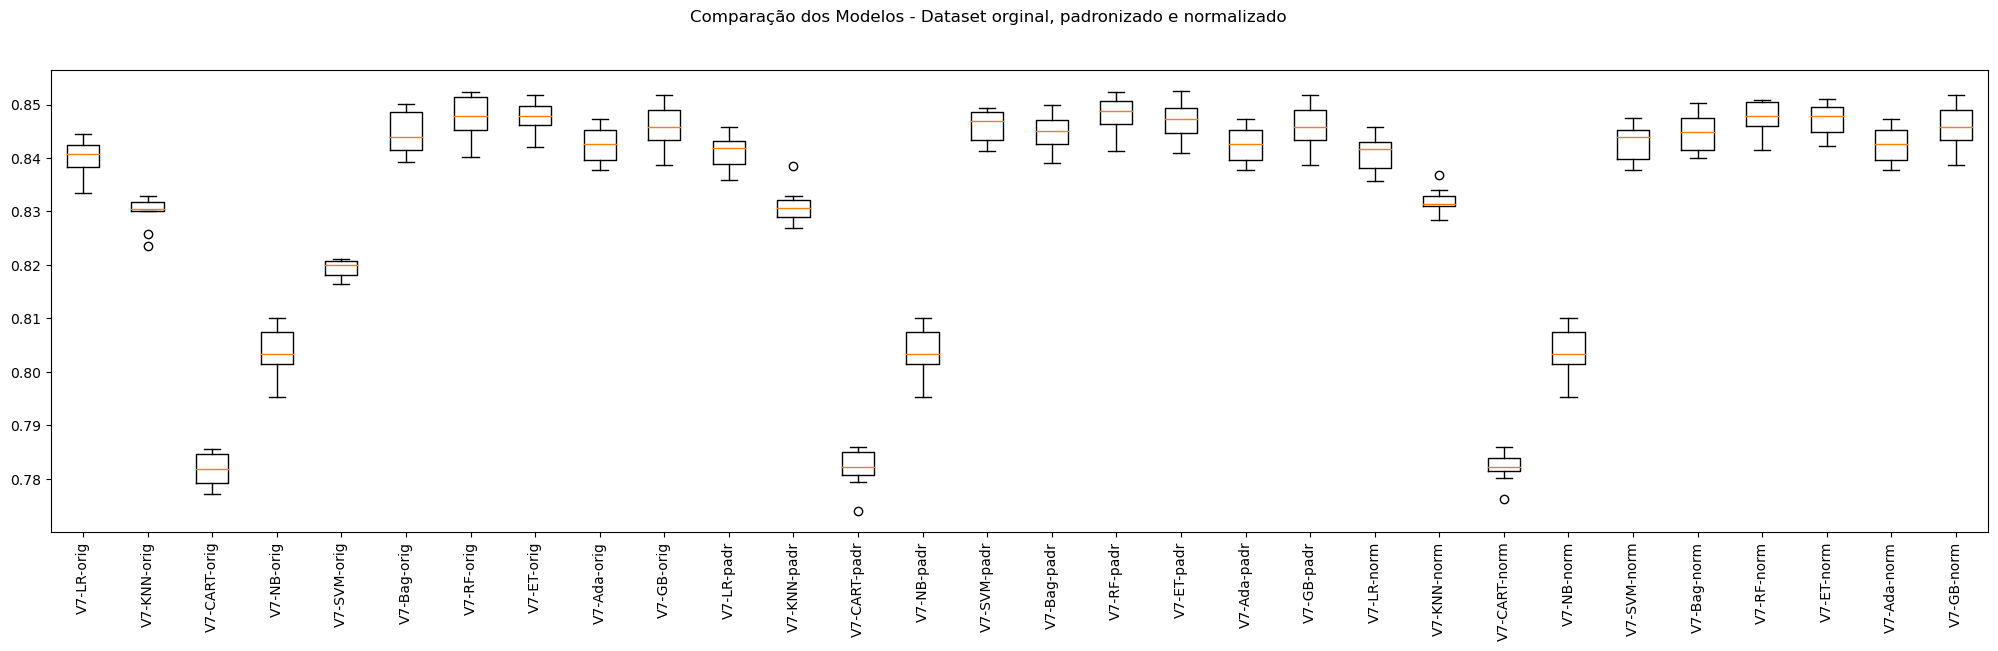

## 5.8. Análise da acurária dos modelos avaliados

Foram avaliadas 30 variações (de algoritmos e configuração dos dados) para cada uma das 7 versões do dataset original, totalizando **210 modelos avaliados**.

Os resultados das médias e desvios-padrão das acurácias destes modelos (para as 10 partições em cada execução) foram agrupados e salvos em arquivo CSV, que será carregado em um novo dataset para permitir uma melhor análise:

In [83]:
acuracias = pd.read_csv('https://github.com/costinhas/puc-rio-machine-learning/raw/main/acuraciaModelos.csv', delimiter=',')

acuracias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VersaoDataset          210 non-null    object 
 1   Algoritmo              210 non-null    object 
 2   MediaAcuracias         210 non-null    float64
 3   DesvioPadraoAcuracias  210 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.7+ KB


Analisando os 10 melhores resultados:

In [84]:
acuracias.sort_values(by='MediaAcuracias', ascending=False).head(10)

,VersaoDataset,Algoritmo,MediaAcuracias,DesvioPadraoAcuracias
14,V1,SVM-padr,0.866,0.006
5,V1,Bag-orig,0.865,0.005
15,V1,Bag-padr,0.864,0.005
25,V1,Bag-norm,0.864,0.006
24,V1,SVM-norm,0.863,0.005
29,V1,GB-norm,0.861,0.005
19,V1,GB-padr,0.861,0.006
9,V1,GB-orig,0.861,0.006
20,V1,LR-norm,0.859,0.004
74,V3,SVM-padr,0.859,0.003


Podemos observar que 9 dos 10 melhores resultados foram obtidos com a versão 1 do dataset (valores nulos removidos, com todos os atributos mantidos), atingindo cerca de 86% de acurácia média. Apenas 1 algoritmo (SVM) que utilizou a versão 3 do dataset (valores nulos substituídos pelas medianas, com todos os atributos mantidos) apresentou acurácia média de 85,9%.


Estes resultados indicam que o uso dos atributos recomendados na etapa de *Feature selection* não foi efetivo para melhoria da acurácia média, já que nenhuma das versões de dataset com atributos selecionados apareceu neste TOP 10.



Selecionamos os 2 modelos que apresentaram melhor desempenho para seguirmos com a etapa de otimização dos hiperparâmetros, em busca de uma melhoria na acurácia média. Ambos foram treinados com a versão 1 do dataset (V1):

* SVM com dados padronizados (`V1-SVM-padr`), com acurácia média de **86,6%**

* BaggingClassifier com dados originais (`V1-Bag-orig`), com acurácia média de **86,5%**

<br><br>

# 6. Otimização dos hiperparâmetros

## 6.1. Versão 1 do dataset - SVM com dados padronizados (V1-SVM-padr)

In [85]:
# Versão do dataset selecionada:
datasetSelecionado = datasetValoresNulosRemovidos

print(datasetSelecionado.shape)

(58090, 121)


In [86]:
# Confirmando que o último atributo deste dataset é a variável target RainTomorrow
print(datasetSelecionado.columns[-1])

RainTomorrow


In [87]:
if (reprocessaTudo == True):

  test_size = 0.20 # tamanho do conjunto de teste
  seed = 7 # semente aleatória

  # Separação em conjuntos de treino e teste
  array = datasetSelecionado.values
  X = array[:,0:120]
  y = array[:,120]
  X_train, X_test, y_train, y_test = train_test_split(X, y,
      test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

  # Parâmetros e partições da validação cruzada
  scoring = 'accuracy'
  num_particoes = 10
  kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [88]:
# Tuning do SVM

if (reprocessaTudo == True):

  np.random.seed(7) # definindo uma semente global para este bloco

  pipelines_svm = []

  # Definindo os componentes do pipeline
  svm = ('SVM', SVC())
  standard_scaler = ('StandardScaler', StandardScaler())
  min_max_scaler = ('MinMaxScaler', MinMaxScaler())

  #pipelines_svm.append(('V1-SVM-orig', Pipeline(steps=[svm])))
  pipelines_svm.append(('V1-SVM-padr', Pipeline(steps=[standard_scaler, svm])))
  #pipelines_svm.append(('V1-SVM-norm', Pipeline(steps=[min_max_scaler, svm])))

  param_grid_svm = {
      'SVM__C': [0.1, 1, 10, 100],
      'SVM__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
      'SVM__gamma': ['scale', 'auto'],
  }

  # Prepara e executa o GridSearchCV
  for name, model in pipelines_svm:
      grid_svm = GridSearchCV(estimator=model, param_grid=param_grid_svm, scoring=scoring, cv=kfold)
      grid_svm.fit(X_train, y_train)
      # Exibe a melhor configuração
      print("%s - Melhor: %f usando %s" % (name, grid_svm.best_score_, grid_svm.best_params_))


Este trecho de código para otimização dos hiperparâmetros deste modelo apresentou um alto tempo de execução, que foi interrompida após 24 horas em processamento.

Por este motivo, este modelo foi desconsiderado nesta etapa.

<br><br>

## 6.2. Versão 1 do dataset - BaggingClassifier com dados originais (V1-Bag-orig)

In [89]:
# Versão do dataset selecionada:
datasetSelecionado = datasetValoresNulosRemovidos

print(datasetSelecionado.shape)

(58090, 121)


In [90]:
# Confirmando que o último atributo deste dataset é a variável target RainTomorrow
print(datasetSelecionado.columns[-1])

RainTomorrow


In [91]:
if (reprocessaTudo == True):

  test_size = 0.20 # tamanho do conjunto de teste
  seed = 7 # semente aleatória

  # Separação em conjuntos de treino e teste
  array = datasetSelecionado.values
  X = array[:,0:120]
  y = array[:,120]
  X_train, X_test, y_train, y_test = train_test_split(X, y,
      test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

  # Parâmetros e partições da validação cruzada
  scoring = 'accuracy'
  num_particoes = 10
  kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [92]:
# Tuning do BaggingClassifier

if (reprocessaTudo == True):

  np.random.seed(7) # definindo uma semente global para este bloco

  pipelines_bagging = []

  # Definindo os componentes do pipeline
  bagging = ('Bagging', BaggingClassifier())
  #standard_scaler = ('StandardScaler', StandardScaler())
  #min_max_scaler = ('MinMaxScaler', MinMaxScaler())

  pipelines_bagging.append(('V1-Bag-orig', Pipeline(steps=[bagging])))
  #pipelines_bagging.append(('V1-Bag-padr', Pipeline(steps=[standard_scaler, bagging])))
  #pipelines_bagging.append(('V1-Bag-norm', Pipeline(steps=[min_max_scaler, bagging])))

  param_grid_bagging = {
      'Bagging__base_estimator': [None],  # Pode ser um estimador de classificação ou regressão
      'Bagging__n_estimators': [10, 50, 100, 200],  # Número de estimadores no ensemble
      'Bagging__max_samples': [0.5, 0.7, 1.0],  # Número de amostras a serem retiradas do conjunto de treinamento para treinar cada estimador base
      'Bagging__max_features': [0.5, 0.7, 1.0],  # Número de features a serem consideradas para treinar cada estimador base
  }

  # Prepara e executa o GridSearchCV
  for name, model in pipelines_bagging:
      grid_bagging = GridSearchCV(estimator=model, param_grid=param_grid_bagging, scoring=scoring, cv=kfold)
      grid_bagging.fit(X_train, y_train)
      # Exibe a melhor configuração
      print("%s - Melhor: %f usando %s" % (name, grid_bagging.best_score_, grid_bagging.best_params_))


Resultado após execução:

```
V1-Bag-orig - Melhor: 0.866565 usando {'Bagging__base_estimator': None, 'Bagging__max_features': 0.7, 'Bagging__max_samples': 1.0, 'Bagging__n_estimators': 200}
```

A otimização dos hiperparâmetros deste modelo (`V1-Bag-orig`) trouxe um incremento pouco significativo na acurária média, passando de 86,5% para **86,6%**, porém igualando este desempenho ao do melhor modelo avaliado na etapa anterior (`V1-SVM-padr`).

<br>

Esta versão otimizada (`V1-Bag-orig`) foi a escolhida para finalização do modelo, em função de seu desempenho e tempo adequado de execução, quando comparado às outras versões avaliadas.

<br><br>

# 7. Finalização do modelo

## 7.1. Preparação da amostra para simular dados não vistos

Para simulação do modelo com dados não vistos, iremos extrair alguns registros do dataset original e movê-los para um novo um dataset denominado `amostra`.

Estes registros não farão parte do treinamento do modelo e serão utilizados apenas na etapa de simulação dos dados não vistos, mas é importante sabermos qual é o valor da variável RainTomorrow que deverá ser estimado.

In [93]:
# Versão do dataset selecionada (V1):
datasetSelecionado = datasetValoresNulosRemovidos.copy()

print(datasetSelecionado.shape)

(58090, 121)


In [94]:
# Extrair registros aleatórios para serem usados na etapa de simulação com dados não vistos
amostra = datasetSelecionado.sample(n=50)

# Remover estes registros da amostra do dataset original
datasetSelecionado = datasetSelecionado.drop(amostra.index)

print(amostra.shape)

(50, 121)


In [95]:
# Quantidade de registros no dataset após remoção
print(datasetSelecionado.shape)

(58040, 121)


In [96]:
# Confirmando que o último atributo do dataset é a variável target RainTomorrow
print(datasetSelecionado.columns[-1])

RainTomorrow


In [97]:
# Confirmando que o último atributo da amostra também é a variável target RainTomorrow
print(amostra.columns[-1])

RainTomorrow


<br>


## 7.2. Preparação do modelo com todos os dados

In [98]:
seed = 7 # semente aleatória

# Separação dos atributos previsores e target
array = datasetSelecionado.values
X = array[:,0:120]
y = array[:,120]

# Definição do algoritmo selecionado com os parâmetros otimizados
model = BaggingClassifier(estimator=None, max_features=0.7, max_samples=1.0, n_estimators=200)

# Preparação do modelo com todo o dataset
model.fit(X,y)

BaggingClassifier(max_features=0.7, n_estimators=200)

<br>

## 7.3. Simulando a aplicação do modelo com dados não vistos

In [99]:
# Valores da amostra (resultado esperado pela predição do modelo)
resultadosEsperados = amostra.iloc[:, 120].values
print(resultadosEsperados)

[1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1.]


In [100]:
# Predição de classes dos dados de entrada
amostraArray = amostra.values
amostraX = amostraArray[:,0:120]

saidas = model.predict(amostraX)
print(saidas)

[1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0.]


In [101]:
# Exibindo o percentual de acerto da predição
print("O modelo acertou", np.mean(resultadosEsperados == saidas) * 100, "% dos casos")

O modelo acertou 90.0 % dos casos


<br><br>


# 8. Conclusão

Este projeto explorou a criação de um modelo de classificação utilizando algoritmos de *Machine Learning* para prever a ocorrência de chuvas em uma determinada região da Austrália, com base em informações meteorológicas históricas.

Utilizando a linguagem Python e as bibliotecas Pandas, Numpy, Matplotlib e Scikit-learn, foi possível realizar a carga dos dados, análise exploratória e transformações necessárias para um melhor treinamento do modelo, como tratamento de valores nulos e conversão de dados (*One-Hot-Encoding* para dados qualitativos, normalização e padronização para dados quantitativos). Em seguida, foi aplicada a técnica de *Feature Selection* para identificar quais atributos eram mais relevantes para o problema em questão.

Em busca do melhor desempenho possível para o modelo de classificação, foram geradas 7 versões do dataset original, cada uma com diferentes transformações de dados e atributos selecionados. Estas 7 versões foram utilizadas para avaliar 30 combinações distintas de algoritmos e *ensembles* de *Machine Learning*, totalizando 210 modelos avaliados.

Para treinamento dos modelos avaliados, foi considerada a separação dos conjuntos de treinamento e teste com *Holdout* e estratitificação, incluindo também uma etapa de validação cruzada para obter estimativas de desempenho mais estáveis e confiáveis.

Após identificar o modelo com melhor desempenho dentre as 210 opções avaliadas, foi executada uma etapa adicional de otimização dos hiperparâmetros afim de buscar uma possível melhoria em sua acurácia. Ao final do processo, utilizamos o algoritmo de Bagging Classifier com parâmetros otimizados, que apresentou uma acurária média de **86,6%**.

Com as etapas executadas, conclui-se que foi possível atingir ao objetivo deste projeto, validando as hipóteses citadas e desenvolvendo um modelo com capacidade preditiva aceitável para realizar previsões de chuva. Como possíveis evoluções, pode-se explorar a inclusão de dados adicionais, para permitir predição em outras regiões, e algoritmos mais complexos para aprimorar ainda mais a precisão das previsões.






